In [17]:
from run_experiment import Experiment
from radar_plots import RadarPlot
import os
import sys
current_directory = os.getcwd()
if not os.path.exists(current_directory + '\\experimental_data'):
    os.makedirs(current_directory + '\\experimental_data')
    os.makedirs(current_directory + '\\experimental_data\\plots')
    os.makedirs(current_directory + '\\experimental_data\\results')
sys.path.append(current_directory.replace('experiments', ''))
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.set_loglevel('WARNING')
from run import execute_simulation, create_experiment_snapshots, execute_ai_model, single_mtd_simulation, mtd_ai_simulation, multiple_mtd_simulation, specific_multiple_mtd_simulation
from mtdnetwork.mtd.completetopologyshuffle import CompleteTopologyShuffle
from mtdnetwork.mtd.ipshuffle import IPShuffle
from mtdnetwork.mtd.hosttopologyshuffle import HostTopologyShuffle
from mtdnetwork.mtd.portshuffle import PortShuffle
from mtdnetwork.mtd.osdiversity import OSDiversity
from mtdnetwork.mtd.servicediversity import ServiceDiversity
from mtdnetwork.mtd.usershuffle import UserShuffle
from mtdnetwork.mtd.osdiversityassignment import OSDiversityAssignment
import logging
import pandas as pd
import numpy as np
from math import pi
import matplotlib.pyplot as plt
from stacked_plots import StackedBarChart
logging.basicConfig(format='%(message)s', level=logging.INFO)

In [18]:
# Learning Parameters
epsilon = 1.0  # exploration rate

# Simulator Settings
start_time = 0
finish_time = 15000
network_size = 150
total_nodes = 150
new_network = True

trial = 500


mtd_strategies = [
    CompleteTopologyShuffle,
    # HostTopologyShuffle,
    IPShuffle,
    OSDiversity,
    # PortShuffle,
    # OSDiversityAssignment,
    ServiceDiversity,
    # UserShuffle
]
result_head_path = '/Users/williamho/Documents/GitHub/MTDSim'
mtd_intervals = [50,100,200]

In [19]:
static_features = ["host_compromise_ratio", "attack_path_exposure",  "overall_asr_avg", "roa",  "risk"]
time_features = ["mtd_freq", "overall_mttc_avg", "time_since_last_mtd"]
metrics = ["all_features"] + ['hybrid'] + static_features + time_features 

# Data Processing (MTD Interval)

In [20]:
all_model_data = pd.DataFrame()
for mtd_interval in mtd_intervals:
    # Create an empty DataFrame to store all the data for all metrics
    all_model_data_set = pd.DataFrame()

    for metric in metrics:
        models = [
        
            f"{metric}_CompleteTopologyShuffle",
            f"{metric}_IPShuffle",
        
            f"{metric}_OSDiversity",
            f"{metric}_ServiceDiversity",
            metric,
        ]
        
            
        # Initialize the chart for the current model
        chart = StackedBarChart(metric, epsilon, start_time, finish_time, mtd_interval, network_size, total_nodes, new_network, "overview", trial, result_head_path)
        weights = {'ASR': 1, 'time_to_compromise': 1, 'attack_path_exposure': 1, "ROA": 1, "risk": 1}  # Custom weights
        
        # Get data for current model
        schemes_data = pd.DataFrame(chart.multiple_scaled_pipeline(models, run_trial=False))


        
        
        # Concatenate the current schemes_data to all_model_data along the columns (axis=1)
        if all_model_data_set.empty:
            all_model_data_set = schemes_data
        else:
            all_model_data_set = pd.concat([all_model_data_set, schemes_data], axis=1)

    all_model_data = pd.concat([all_model_data, all_model_data_set], axis=1)



In [21]:
all_model_data = all_model_data.T[[ "ROA", "risk", "ASR", "attack_path_exposure","MEF","mtd_interval"]]
all_model_data['sum'] = all_model_data[[  "ASR","attack_path_exposure","ROA", "risk",]].sum(axis=1)



In [22]:
all_model_data

,ROA,risk,ASR,attack_path_exposure,MEF,mtd_interval,sum
all_features_CompleteTopologyShuffle,1.187243,1.093787,1.895748,2.050397,0.006623,50.0,6.227174
all_features_IPShuffle,1.128883,1.119057,2.133796,1.571835,0.006625,50.0,5.953570
all_features_OSDiversity,1.587391,1.419403,3.639009,2.508306,0.009917,50.0,9.154109
all_features_ServiceDiversity,1.261374,1.187640,3.364272,2.366619,0.009927,50.0,8.179905
all_features,1.263465,1.168677,2.468638,2.243796,0.009223,50.0,7.144577
...,...,...,...,...,...,...,...
time_since_last_mtd_CompleteTopologyShuffle,1.246372,1.179879,1.508145,2.211664,0.005038,200.0,6.146060
time_since_last_mtd_IPShuffle,1.002880,1.005583,1.663715,1.722391,0.005034,200.0,5.394569
time_since_last_mtd_OSDiversity,1.317353,1.169323,1.555809,2.659974,0.005066,200.0,6.702459
time_since_last_mtd_ServiceDiversity,1.213557,1.074634,1.539686,2.589975,0.005077,200.0,6.417852


In [23]:
data = {}

In [24]:
def get_mtd_set(data):
    sets = {}
    mtd_schemes = [
        "CompleteTopologyShuffle",
        "IPShuffle",
        "OSDiversity",
        "ServiceDiversity",
        "AnyMTD"
    ]

    # Create a combined regex pattern for the MTD schemes
    mtd_regex = '|'.join(mtd_schemes)

    # Loop through the MTD schemes and filter matching columns
    for mtd in mtd_schemes:
        metric_data = data.filter(regex=mtd)  # Filter columns matching the MTD scheme
        sets[mtd] = metric_data  # Store filtered data in sets dictionary with MTD scheme as key

    # Filter the columns that do NOT match any of the MTD schemes
    # Filter the columns that contain any of the MTD schemes
    excluded_data = data.filter(regex=f'^(?!.*({mtd_regex})).*', axis=1)

    # Add suffix '_all_mtd' to all columns in the excluded_data DataFrame
    excluded_data = excluded_data.rename(columns=lambda x: f"{x}_AnyMTD")
    # Store the excluded data (non-MTD scheme columns) in the sets dictionary
    sets['AnyMTD'] = excluded_data

    return sets

In [25]:
for mtd_interval in mtd_intervals:
    interval_data = all_model_data[all_model_data['mtd_interval'] == mtd_interval].T
    data[f"mtd_interval_{mtd_interval}"] = get_mtd_set(interval_data)

In [26]:
data['mtd_interval_100']["AnyMTD"]

,all_features_AnyMTD,hybrid_AnyMTD,host_compromise_ratio_AnyMTD,attack_path_exposure_AnyMTD,overall_asr_avg_AnyMTD,roa_AnyMTD,risk_AnyMTD,mtd_freq_AnyMTD,overall_mttc_avg_AnyMTD,time_since_last_mtd_AnyMTD
ROA,1.152683,1.254755,1.258836,1.308524,1.374935,1.264310,1.281550,1.280759,1.312882,1.405845
risk,1.123573,1.144433,1.160357,1.177332,1.225550,1.158631,1.144601,1.111862,1.229391,1.261219
ASR,2.086719,2.124949,2.112107,2.131274,2.129082,2.122435,2.115989,2.117749,2.109839,2.115854
attack_path_exposure,2.303309,2.276588,2.307598,2.290591,2.301004,2.297721,2.343311,2.292369,2.289703,2.318990
MEF,0.007259,0.007297,0.007277,0.007298,0.007290,0.007286,0.007273,0.007294,0.007314,0.007276
mtd_interval,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
sum,6.666283,6.800725,6.838898,6.907720,7.030572,6.843097,6.885451,6.802740,6.941814,7.101908


In [27]:
def get_metrics_set(data):
    sets = {}
    metrics_schemes = [
    "all_features"  ,    # Blue
    "hybrid",             # Orange
    "host_compromise_ratio",  # Green
    "attack_path_exposure",   # Red
    "overall_asr_avg",         # Purple
    "roa",                    # Brown
    "risk",                   # Pink
    "mtd_freq",               # Grey
    "overall_mttc_avg",      # Yellow-Green
    "time_since_last_mtd"
    ]



    # Loop through the MTD schemes and filter matching columns
    for metric in metrics_schemes:
        metric_data = data.filter(regex=metric)  # Filter columns matching the MTD scheme
        sets[metric] = metric_data  # Store filtered data in sets dictionary with MTD scheme as key

   
    return sets

In [28]:
data_metrics = data.copy()
for mtd_interval in mtd_intervals:
    interval_data = all_model_data[all_model_data['mtd_interval'] == mtd_interval].T
    data_metrics[f"mtd_interval_{mtd_interval}"] = get_metrics_set(interval_data)

In [29]:
data_metrics['mtd_interval_50']['host_compromise_ratio']

,host_compromise_ratio_CompleteTopologyShuffle,host_compromise_ratio_IPShuffle,host_compromise_ratio_OSDiversity,host_compromise_ratio_ServiceDiversity,host_compromise_ratio
ROA,1.046535,1.048371,1.584971,1.283962,1.270025
risk,1.081542,1.065092,1.353237,1.167078,1.151444
ASR,1.907008,2.114702,3.571973,3.367625,2.453411
attack_path_exposure,2.046772,1.554992,2.510690,2.380283,2.235472
MEF,0.006623,0.006625,0.009918,0.009927,0.009357
mtd_interval,50.000000,50.000000,50.000000,50.000000,50.000000
sum,6.081858,5.783158,9.020871,8.198948,7.110352


In [30]:
metrics_schemes = [
        "all_features"  ,    # Blue
    "hybrid",             # Orange
    "host_compromise_ratio",  # Green
    "attack_path_exposure",   # Red
    "overall_asr_avg",         # Purple
    "roa",                    # Brown
    "risk",                   # Pink
    "mtd_freq",               # Grey
    "overall_mttc_avg",      # Yellow-Green
    "time_since_last_mtd"
    ]

In [31]:
data_metrics['mtd_interval_200']

{'all_features':                       all_features_CompleteTopologyShuffle  \
 ROA                                               1.145585   
 risk                                              1.102850   
 ASR                                               1.514581   
 attack_path_exposure                              2.253871   
 MEF                                               0.005037   
 mtd_interval                                    200.000000   
 sum                                               6.016888   
 
                       all_features_IPShuffle  all_features_OSDiversity  \
 ROA                                 1.091560                  1.355360   
 risk                                1.111268                  1.244080   
 ASR                                 1.697130                  1.565371   
 attack_path_exposure                1.707930                  2.689045   
 MEF                                 0.005034                  0.005066   
 mtd_interval               

# MTD Effect on metrics optimization

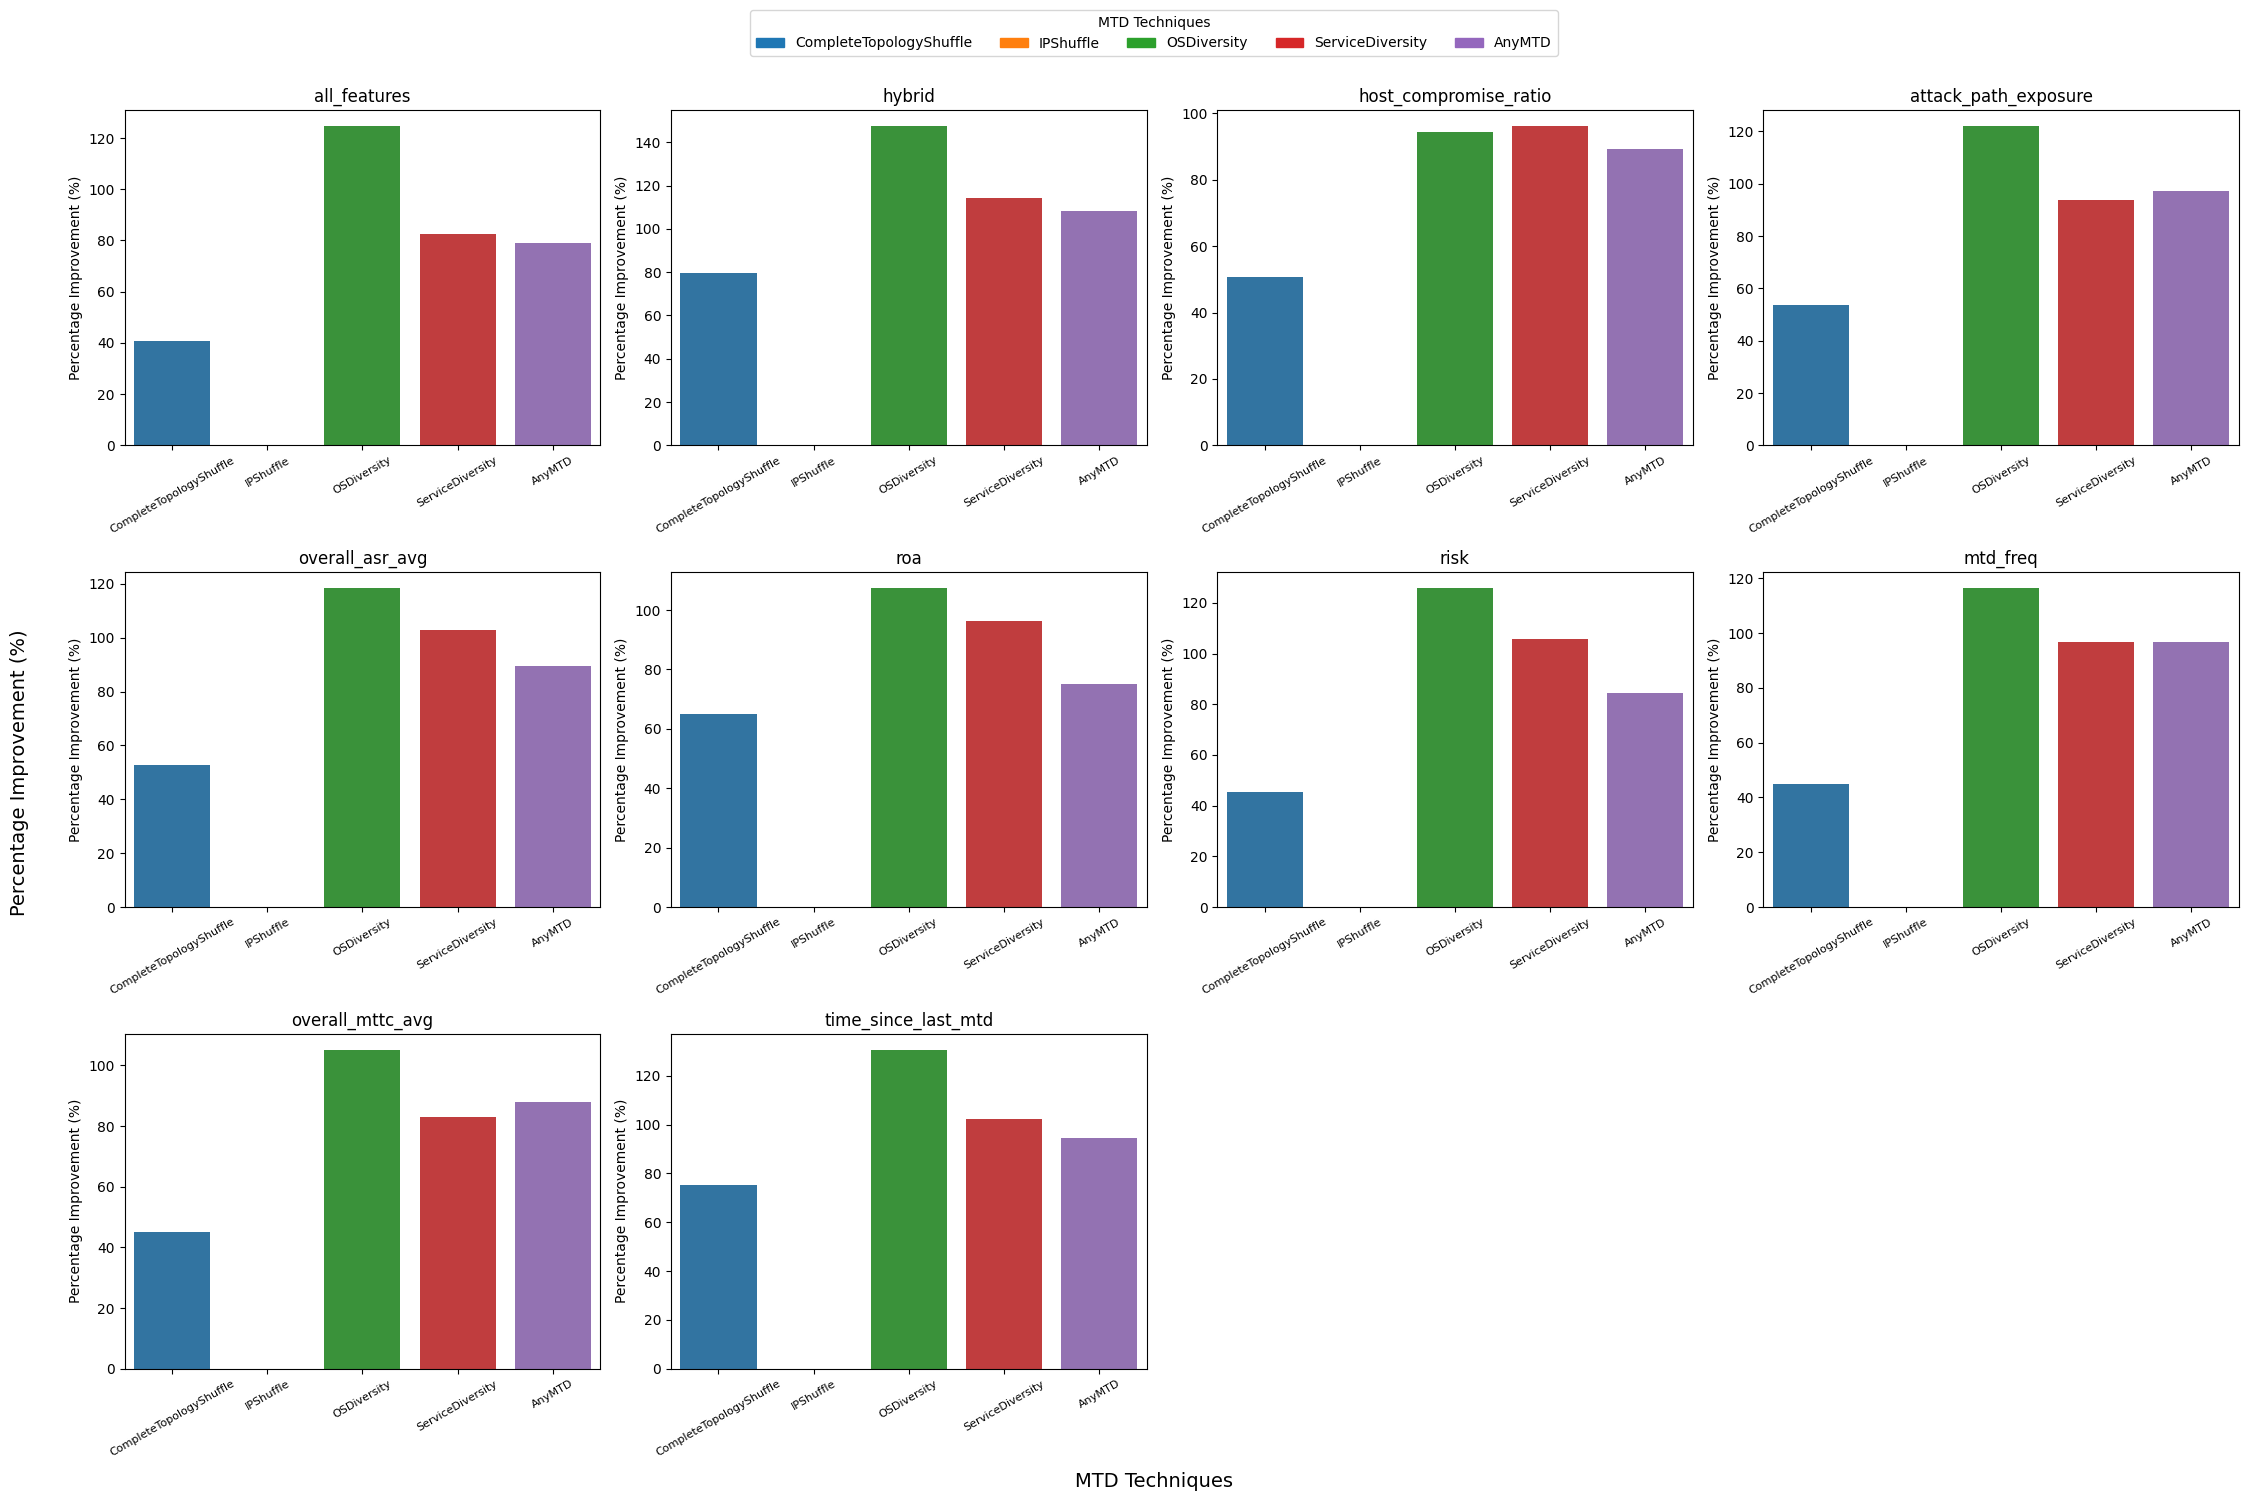

In [42]:
import seaborn as sns
# Set up the figure for subplots
num_metrics = len(metrics_schemes)  # Use the length of metrics_schemes
num_rows = (num_metrics + 1) // 3  # Adjust number of rows based on metrics count
num_cols = 4  # Keep a fixed number of columns

mtd_schemes = [
    "CompleteTopologyShuffle",
    "IPShuffle",
    "OSDiversity",
    "ServiceDiversity",
    "AnyMTD"
]
# Define base colors for each MTD scheme
base_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']  # Blue, Orange, Green, Red, Purple

# Create subplots with the specified number of rows and columns
fig, axes = plt.subplots(num_rows, num_cols, figsize=(22, 14))

# Flatten axes array for easy indexing if there are multiple rows
axes = axes.flatten()

# Loop through each metric scheme for mtd_interval_200
for i, metric in enumerate(metrics_schemes):
    sample = data_metrics['mtd_interval_200'][metric]
    
    # Create a DataFrame from the sample data
    sample_df = pd.DataFrame(sample).T
    
    # Sort the DataFrame by the 'sum' column
    sample_df = sample_df
    
    # Prepare x values based on the mtd_schemes
    x_val = [
        name.split("_")[-1] if name.split("_")[-1] in mtd_schemes else "AnyMTD"
        for name in sample_df.index
    ]

    # Create a bar plot
    sns.barplot(x=x_val, y=(sample_df['sum'] - sample_df['sum'].min())*100, ax=axes[i], palette=base_colors)
    
    # Rotate x-axis tick labels for better visibility
    axes[i].set_xticklabels(x_val, rotation=30, fontsize=8)
    
    # Add labels and title
    axes[i].set_ylabel('Percentage Improvement (%)')
    axes[i].set_title(f'{metric}')

# Hide any unused axes
for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axes[j])

# Create a global legend based on mtd_schemes
handles = [plt.Rectangle((0, 0), 1, 1, color=base_colors[i]) for i in range(len(mtd_schemes))]
labels = mtd_schemes

# Place the global legend outside the subplots
fig.legend(handles, labels, title='MTD Techniques', loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=len(mtd_schemes))

# Add global x and y labels
fig.text(0.5, -0.01, 'MTD Techniques', ha='center', fontsize=14)
fig.text(-0.02, 0.5, 'Percentage Improvement (%)', va='center', rotation='vertical', fontsize=14)

# Adjust layout to prevent overlap AFTER adding global labels
plt.tight_layout()
# Save the figure
# Save the figure, ensuring all elements are included
plt.savefig("Effects_of_MTD_technique.png", bbox_inches='tight')

# Show the plots
plt.show()


In [33]:
print(A)

NameError: name 'A' is not defined

# Data Visualization

In [ ]:
data['mtd_interval_100']

{'CompleteTopologyShuffle':                       all_features_CompleteTopologyShuffle  \
 ROA                                               1.217108   
 risk                                              1.140726   
 ASR                                               1.517635   
 attack_path_exposure                              2.214429   
 MEF                                               0.005025   
 mtd_interval                                    100.000000   
 sum                                               6.089897   
 
                       hybrid_CompleteTopologyShuffle  \
 ROA                                         1.237485   
 risk                                        1.164875   
 ASR                                         1.506355   
 attack_path_exposure                        2.236797   
 MEF                                         0.005026   
 mtd_interval                              100.000000   
 sum                                         6.145512   
 
         

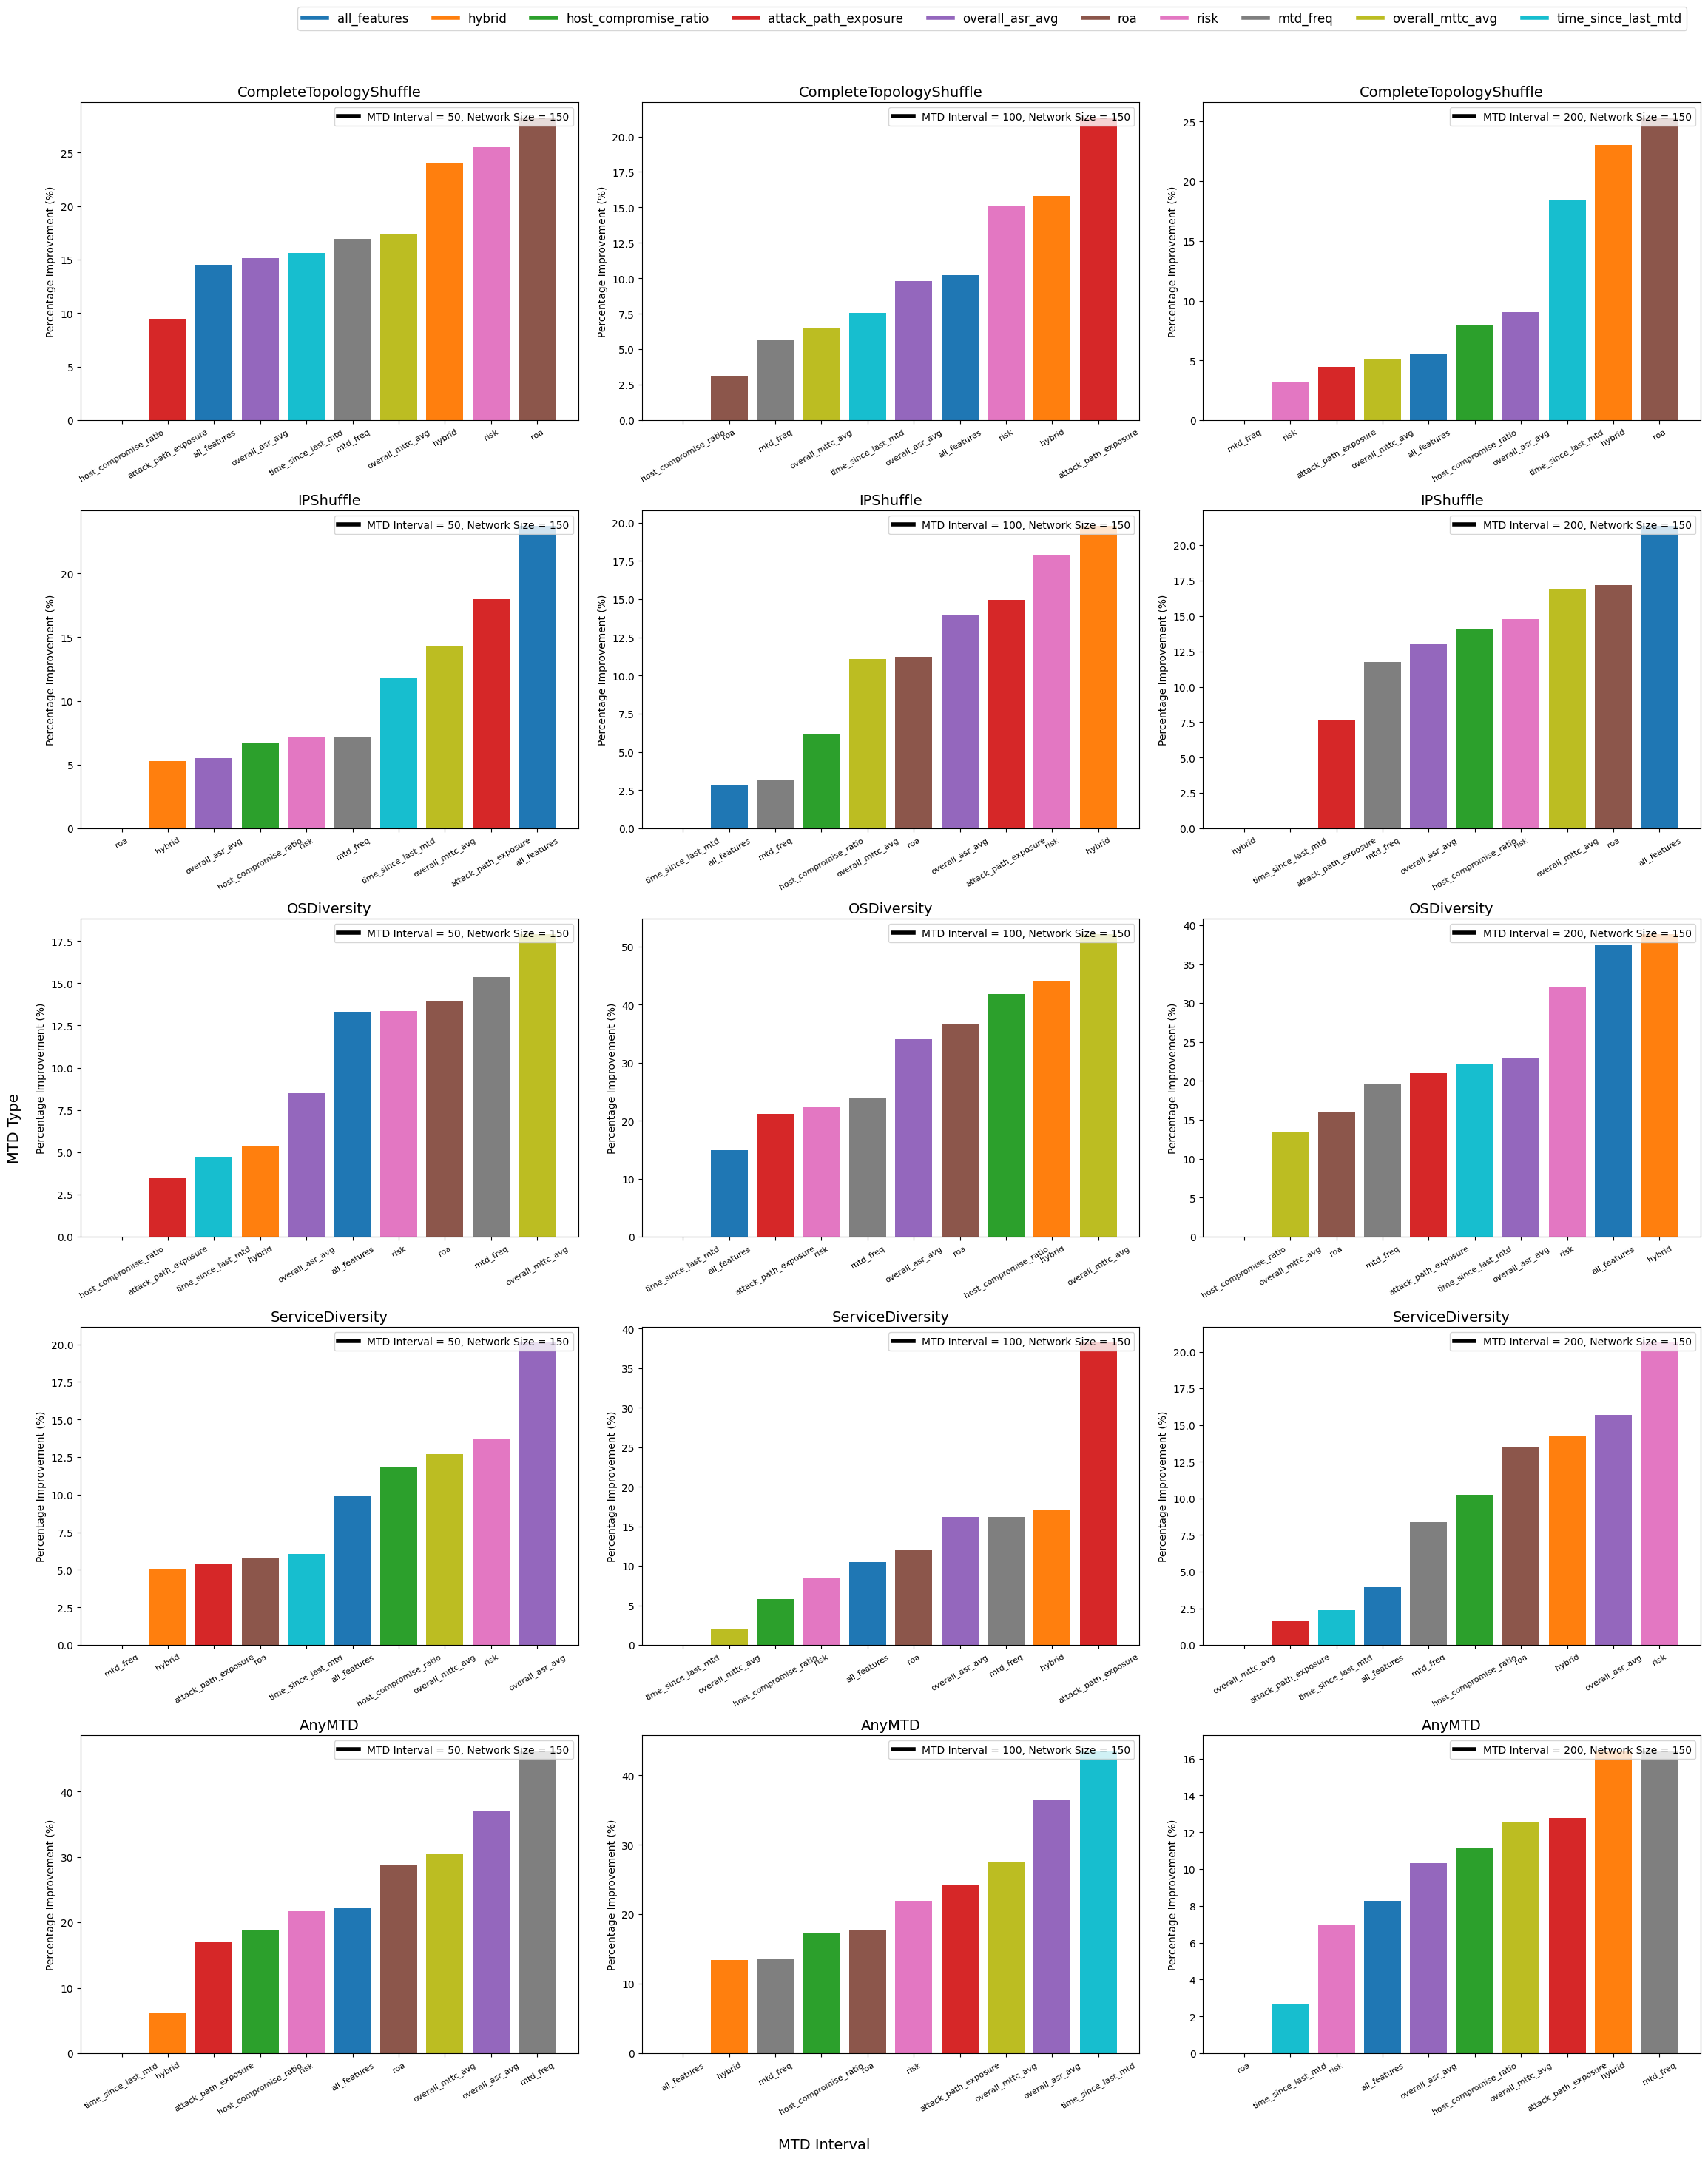

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D  # Import Line2D for custom legend handles

# Define a color mapping for the metrics
color_mapping = {
    "all_features": "#1f77b4",       # Blue
    "hybrid": "#ff7f0e",             # Orange
    "host_compromise_ratio": "#2ca02c",  # Green
    "attack_path_exposure": "#d62728",   # Red
    "overall_asr_avg": "#9467bd",         # Purple
    "roa": "#8c564b",                    # Brown
    "risk": "#e377c2",                   # Pink
    "mtd_freq": "#7f7f7f",               # Grey
    "overall_mttc_avg": "#bcbd22",      # Yellow-Green
    "time_since_last_mtd": "#17becf"     # Cyan
}

num_rows = 5  # Switch rows and columns for transposed layout
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(24, 30))  # Larger figsize for better visibility

# Initialize a subplot index
subplot_idx = 0

# Create a set to store unique metric labels used across all subplots
unique_labels_set = set()

# Iterate over each mtd_interval to create a stacked bar plot
for mtd_interval in mtd_intervals:
    # Iterate through the mtd data
    for mtd in data[f'mtd_interval_{mtd_interval}']:
        # Transpose the subplot arrangement: calculate row and col by switching them
        row = subplot_idx % num_rows
        col = subplot_idx // num_rows
        
        # Check to avoid out-of-bounds error
        if col < num_cols:
            data_copy = data[f'mtd_interval_{mtd_interval}'][mtd].drop("mtd_interval", axis=0)

            mtd_data = data_copy.filter(regex=mtd).T.sort_values(by='sum').T
            mtd_data = mtd_data.T['sum'].T  # Filter data for the current mtd
 
            # Modify x-tick labels: Remove the last part after the last underscore
            modified_labels = ['_'.join(label.split('_')[:-1]) for label in mtd_data.index]
            colors = [color_mapping[label] for label in modified_labels if label in color_mapping]

            # Extract and normalize the values
            values = mtd_data.values  # Extract values to plot
            normalized_values = (values - np.min(values)) * 100

            # Create the bar plot
            bars = axes[row, col].bar(modified_labels, normalized_values, color=colors)

            # Add labels and title for each subplot
            axes[row, col].set_ylabel('Percentage Improvement (%)', fontsize=10)
            axes[row, col].set_title(f'{mtd}', fontsize=14)

            # Rotate the x-axis labels by 30 degrees for better readability
            axes[row, col].tick_params(axis='x', rotation=30)

            # Set x-tick labels with a smaller font size
            axes[row, col].set_xticklabels(modified_labels, fontsize=8)

            # Add labels to the unique set for the global legend
            unique_labels_set.update(modified_labels)

            # Create a custom black label for the legend
            black_label = Line2D([0], [0], color='black', lw=4)

            # Add local legend for MTD interval with a black label
            legend = axes[row, col].legend([black_label], [f'MTD Interval = {mtd_interval}, Network Size = 150'], loc='upper right', fontsize=10)

            # Increment the subplot index
            subplot_idx += 1

# Prepare global legend handles
unique_labels = color_mapping.keys()
legend_handles = [Line2D([0], [0], color=color_mapping.get(label, "#000000"), lw=4) for label in unique_labels]


fig.legend(legend_handles, unique_labels, loc="center left", ncol=len(color_mapping), bbox_to_anchor=(0.2, 1), fontsize=12)

# Add overall x-label and y-label
fig.text(0.5, 0.04, 'MTD Interval', ha='center', fontsize=14)  # X-axis label
fig.text(0.04, 0.5, 'MTD Type', va='center', rotation='vertical', fontsize=14)  # Y-axis label

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0.05, 0.05, 1, 0.975])  # Adjust layout to make room for the global legend
plt.savefig("mtd_interval_sets_rank.png")
# Show the plots
plt.show()


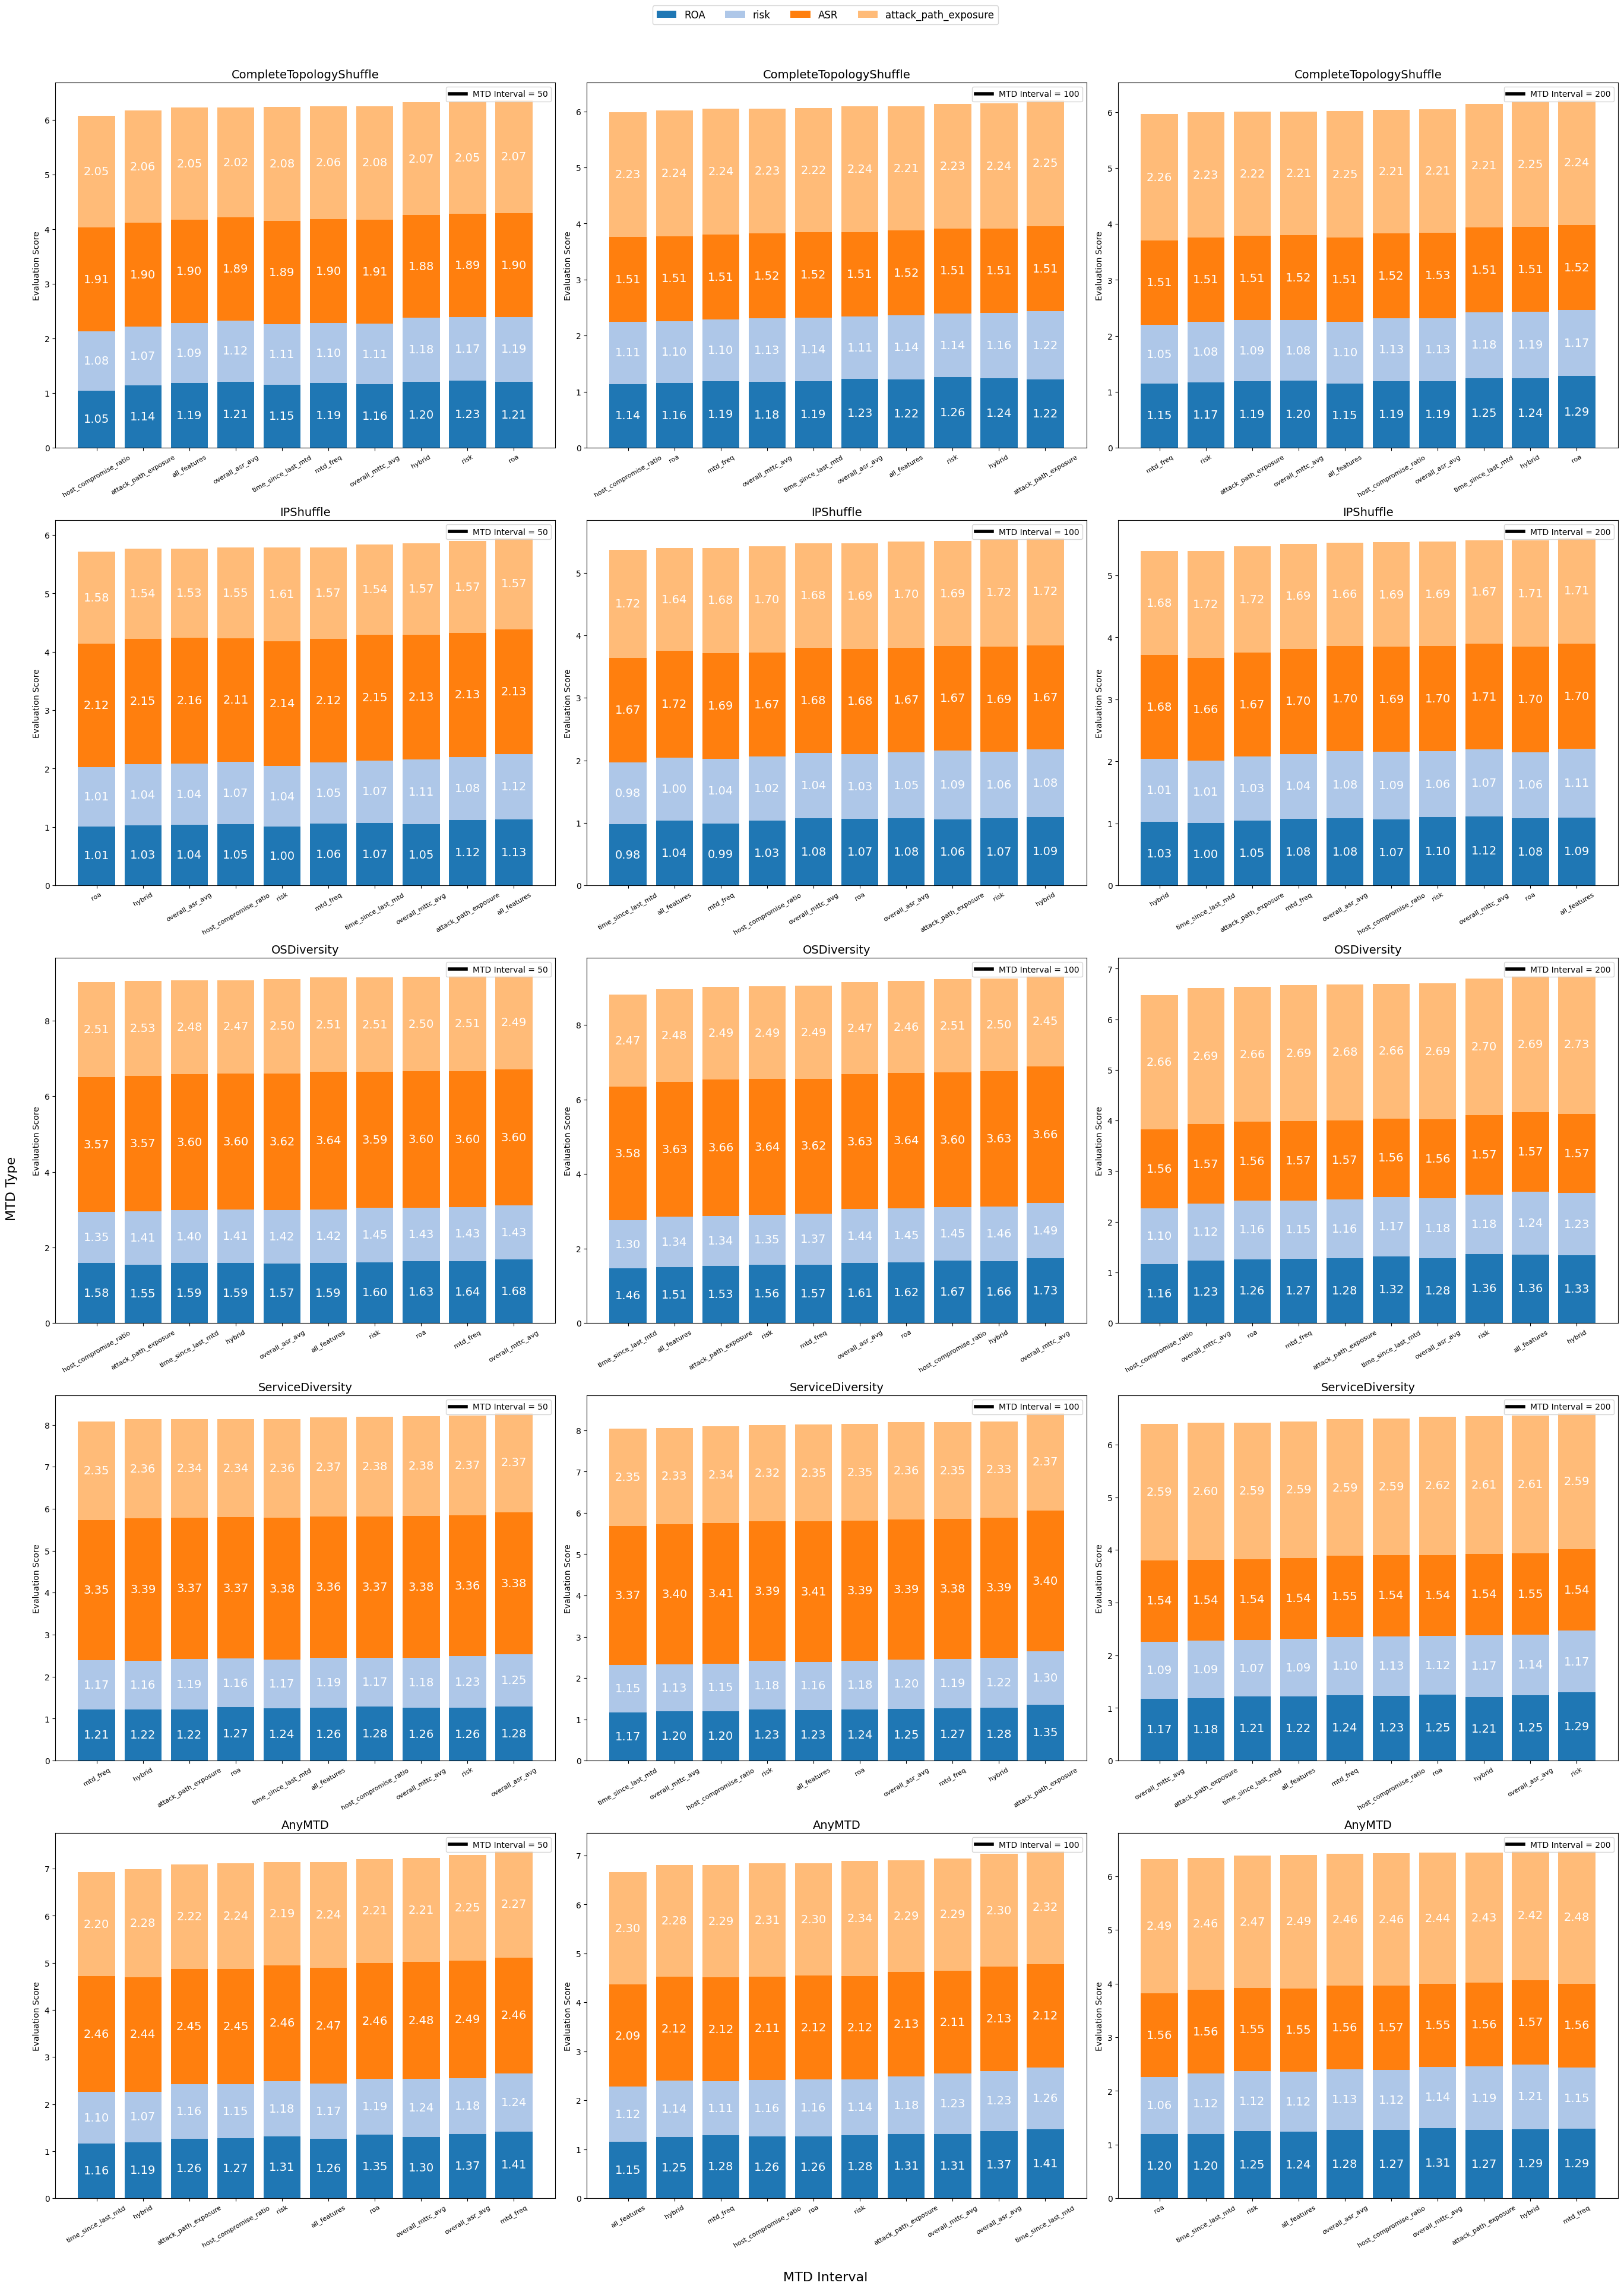

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D  # Import Line2D for custom legend handles

num_rows = 5
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(30, 40))  # Larger figsize for better visibility

# Initialize a subplot index
subplot_idx = 0

# For global MTD type legend
mtd_type_handles = []

# Iterate over each mtd_interval to create a stacked bar plot
for mtd_interval in mtd_intervals:
    # Iterate through the mtd data
    for mtd in data[f'mtd_interval_{mtd_interval}']:
        # Calculate the current row and column index for the subplot (transposed order)
        col = subplot_idx // num_rows  # Calculate column first (transposed)
        row = subplot_idx % num_rows  # Calculate row next (transposed)
        
        # Check to avoid out-of-bounds error
        if col < num_cols:
            data_copy = data[f'mtd_interval_{mtd_interval}'][mtd].drop("mtd_interval", axis=0)

            mtd_data = data_copy.filter(regex=mtd).T.sort_values(by='sum').T
            mtd_data = mtd_data.drop(["sum", "MEF"]).T  # Filter data for the current mtd

            # Extract MTD names and values for plotting
            mtd_names = mtd_data.columns  # Extract MTD names
            values = mtd_data.values  # Extract values to plot

            # Create a stacked bar plot
            bottom = np.zeros(len(mtd_data))  # Initialize bottom to stack bars
            colors = plt.cm.tab20.colors  # Get colors for each MTD
            
            for i, mtd_name in enumerate(mtd_names):
                bars = axes[row, col].bar(mtd_data.index, values[:, i], 
                                           label=mtd_name, color=colors[i % len(colors)], bottom=bottom)
                
                # Annotate the bars with the value
                for j, bar in enumerate(bars):
                    height = bar.get_height()
                    axes[row, col].text(bar.get_x() + bar.get_width() / 2., bottom[j] + height / 2, 
                                        f'{height:.2f}', ha='center', va='center', fontsize=14, color='white')
                
                bottom += values[:, i]  # Update bottom for stacking

                # Collect handles for global legend (first subplot only)
                if subplot_idx == 0:
                    mtd_type_handles.append(bars[0])

            # Add labels and title for each subplot
            axes[row, col].set_ylabel('Evaluation Score', fontsize=10)
            axes[row, col].set_title(f'{mtd}', fontsize=14)

            # Rotate the x-axis labels by 30 degrees for better readability
            axes[row, col].tick_params(axis='x', rotation=30)

            # Modify x-tick labels: Remove the last part after the last underscore
            modified_labels = ['_'.join(label.split('_')[:-1]) for label in mtd_data.index]
            axes[row, col].set_xticklabels(modified_labels, fontsize=8)  # Set smaller font size for x-axis labels
            
            black_label = Line2D([0], [0], color='black', lw=4)

            # Add local legend for MTD interval with a black label
            legend = axes[row, col].legend([black_label], [f'MTD Interval = {mtd_interval}'], loc='upper right', fontsize=10)
            
            # Increment the subplot index
            subplot_idx += 1

# Add global legend for MTD types outside of subplots
fig.legend(mtd_type_handles, mtd_names, loc='upper center', bbox_to_anchor=(0.5, 1), ncol=len(mtd_names), fontsize=12)

# Add overall x-label and y-label
fig.text(0.5, 0.04, 'MTD Interval', ha='center', fontsize=16)  # X-axis label
fig.text(0.04, 0.5, 'MTD Type', va='center', rotation='vertical', fontsize=16)  # Y-axis label

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0.05, 0.05, 0.95, 0.975])  # Adjust layout to make room for labels
plt.savefig("mtd_interval_sets_score.png")
plt.show()


In [ ]:
data_metrics['mtd_interval_50']['all_features'].T['sum'].mean()

7.331867187596861

In [ ]:
metrics_schemes = [
        "all_features"  ,    # Blue
    "hybrid",             # Orange
    "host_compromise_ratio",  # Green
    "attack_path_exposure",   # Red
    "overall_asr_avg",         # Purple
    "roa",                    # Brown
    "risk",                   # Pink
    "mtd_freq",               # Grey
    "overall_mttc_avg",      # Yellow-Green
    "time_since_last_mtd"
    ]

for mtd_interval in mtd_intervals:
    for metric in metrics_schemes:
        print(metric,mtd_interval,data_metrics[f'mtd_interval_{mtd_interval}'][metric].T['sum'].mean())


all_features 50 7.331867187596861
hybrid 50 7.256377123735922
host_compromise_ratio 50 7.239037244897415
attack_path_exposure 50 7.27115217072171
overall_asr_avg 50 7.33728966128732
roa 50 7.318003428675359
risk 50 7.327378612738803
mtd_freq 50 7.335981842129785
overall_mttc_avg 50 7.350362131855549
time_since_last_mtd 50 7.240861777231094
all_features 100 7.049838608758343
hybrid 100 7.193381012098456
host_compromise_ratio 100 7.114933961507623
attack_path_exposure 100 7.2124423992473625
overall_asr_avg 100 7.193576916480099
roa 100 7.134252165050976
risk 100 7.144132826176284
mtd_freq 100 7.09783520220857
overall_mttc_avg 100 7.17149118753926
time_since_last_mtd 100 7.074933448587295
all_features 200 6.2619967916928685
hybrid 200 6.2940511384034865
host_compromise_ratio 200 6.195907170980501
attack_path_exposure 200 6.20391569664538
overall_asr_avg 200 6.250699985568022
roa 200 6.253116852026166
risk 200 6.264358798486744
mtd_freq 200 6.221401960061994
overall_mttc_avg 200 6.20495554

In [ ]:
# Initialize an empty list to store the results
results = []

# Loop through the MTD intervals and metrics schemes
for mtd_interval in mtd_intervals:
    for metric in metrics_schemes:
        mean_value = data_metrics[f'mtd_interval_{mtd_interval}'][metric].T['sum'].mean()
        std_value = data_metrics[f'mtd_interval_{mtd_interval}'][metric].T['sum'].std()
        
        # Append the results as a dictionary to the list
        results.append({
            'Metric': metric,
            'MTD Interval': mtd_interval,
            'Mean': mean_value,
            'Standard Deviation': std_value
        })

# Create a DataFrame from the results list
results_df = pd.DataFrame(results)
# Set the 'Metric' column as the index
results_df.set_index('Metric', inplace=True)

In [ ]:
results_df[results_df['MTD Interval'] == 200].sort_values(by="Mean")

,MTD Interval,Mean,Standard Deviation
Metric,,,
host_compromise_ratio,200,6.195907,0.413642
time_since_last_mtd,200,6.200511,0.492851
attack_path_exposure,200,6.203916,0.477810
overall_mttc_avg,200,6.204956,0.420893
mtd_freq,200,6.221402,0.477237
overall_asr_avg,200,6.250700,0.473124
roa,200,6.253117,0.419452
all_features,200,6.261997,0.470662
risk,200,6.264359,0.502597


In [ ]:
6.294051 - 6.195907	

0.09814399999999956

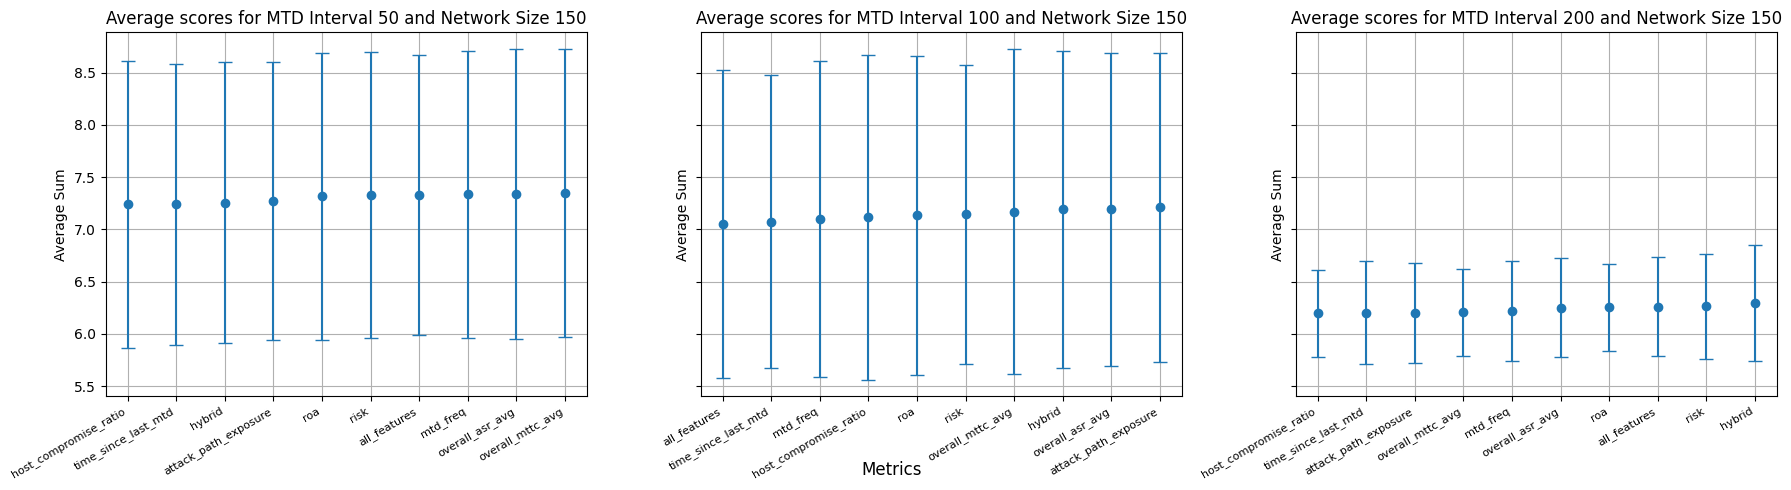

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a figure with subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

# List of unique intervals
intervals = results_df['MTD Interval'].unique()

# Collect handles and labels for the legend
handles = []
labels = []

# Iterate through each subplot
for i, mtd_interval in enumerate(intervals):
    # Filter DataFrame for the current MTD Interval
    df_subset = results_df[results_df['MTD Interval'] == mtd_interval]
    
    # Sort by mean in ascending order
    df_subset = df_subset.sort_values(by='Mean')
    
    # Plotting mean with error bars
    handle = axs[i].errorbar(df_subset.index, df_subset['Mean'], 
                             yerr=df_subset['Standard Deviation'], 
                             fmt='o', label=f'MTD Interval {mtd_interval}', capsize=5)
    
    # Store handle and label for the legend
    handles.append(handle[0])  # Add the first element of the handle
    labels.append(f'MTD Interval {mtd_interval}')

    # Set titles and labels
    axs[i].set_title(f'Average scores for MTD Interval {mtd_interval} and Network Size {150}')
    axs[i].set_ylabel('Average Sum')
    axs[i].grid(True)
    axs[i].set_xticklabels(df_subset.index, rotation=30, ha='right', fontsize=8)

# Set a global x-label
fig.text(0.5, 0.04, 'Metrics', ha='center', fontsize=12)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.savefig("overall_MTD_interval_effect.png")
plt.show()


11.132488695813425
16.260379048901985
9.814396742298559


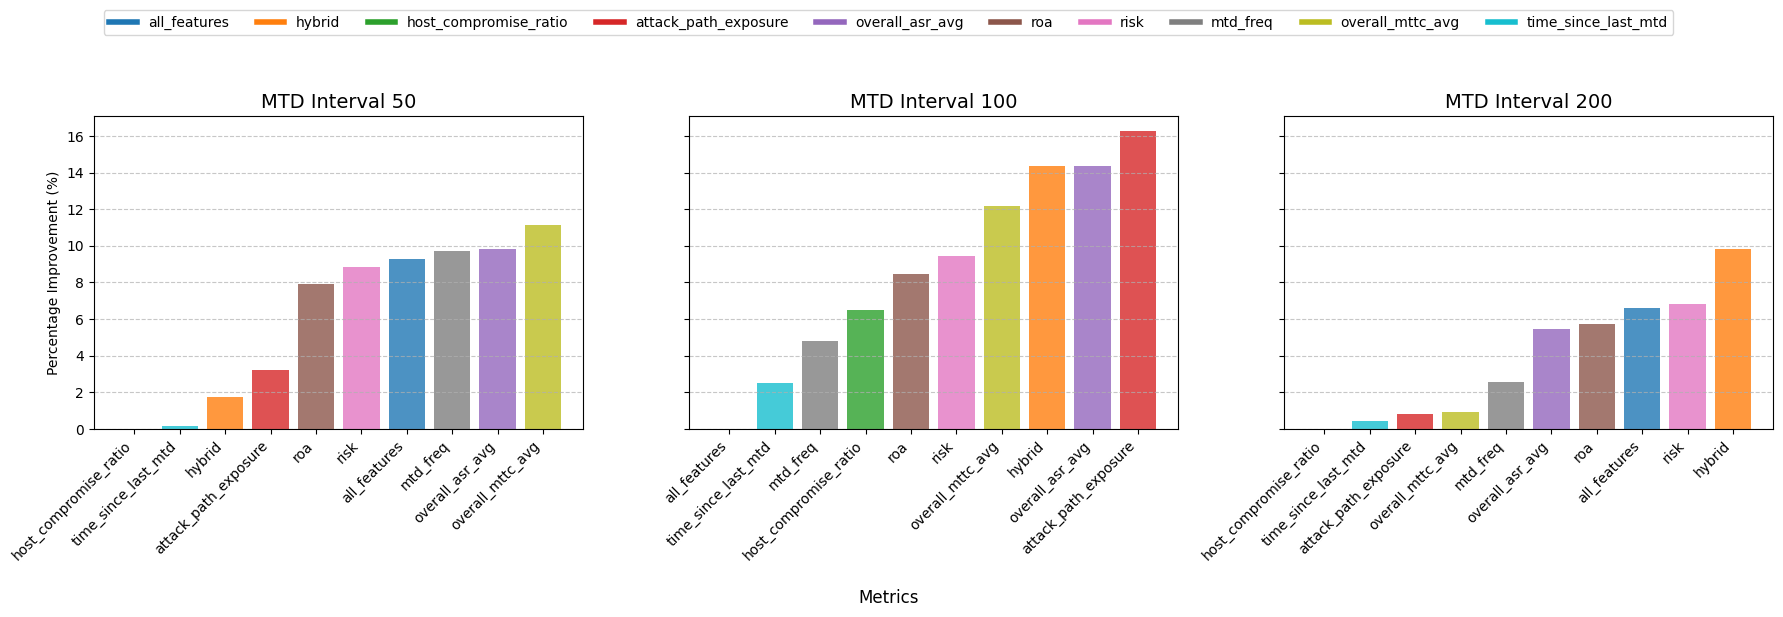

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Use "tab10" colormap for distinct metric colors
unique_metrics = results_df.index.unique()
colors = plt.cm.tab10(np.linspace(0, 1, len(unique_metrics)))
color_map = dict(zip(unique_metrics, colors))  # Map each metric to a unique color

# Create a figure with subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

# List of unique MTD intervals
intervals = results_df['MTD Interval'].unique()

# Iterate through each subplot for the different MTD intervals
for i, mtd_interval in enumerate(intervals):
    # Filter DataFrame for the current MTD Interval
    df_subset = results_df[results_df['MTD Interval'] == mtd_interval]
    
    # Sort by mean in ascending order
    df_subset = df_subset.sort_values(by='Mean')
    
    # Normalize the Mean
    df_subset['Normalized Mean'] = (df_subset['Mean'] - df_subset['Mean'].min()) * 100
    print(df_subset['Normalized Mean'].max())
    # Plot bars with assigned colors
    bars = axs[i].bar(
        df_subset.index, df_subset['Normalized Mean'], 
        color=[color_map[metric] for metric in df_subset.index], alpha=0.8
    )

    # Set titles and labels for each subplot
    axs[i].set_title(f'MTD Interval {mtd_interval}', fontsize=14)
    axs[i].set_ylabel('Percentage Improvement (%)' if i == 0 else "")
    axs[i].grid(axis='y', linestyle='--', alpha=0.7)

    # Adjust x-tick labels for readability
    axs[i].set_xticks(range(len(df_subset.index)))
    axs[i].set_xticklabels(df_subset.index, rotation=45, ha='right', fontsize=10)

# Create a global legend
handles = [plt.Line2D([0], [0], color=color_map[metric], lw=4, label=metric) 
           for metric in unique_metrics]
fig.legend(handles=handles, loc='upper center', ncol=len(unique_metrics), bbox_to_anchor=(0.5, 1.15))

# Set a global x-label
fig.text(0.5, -0.05, 'Metrics', ha='center', fontsize=12)

# Adjust layout and spacing
plt.tight_layout()

# Save the figure
plt.savefig("overall_MTD_interval_effect_normalized.png", bbox_inches='tight')

# Show the plot
plt.show()


In [ ]:
data_backup = data
data_backup

{'mtd_interval_50': {'CompleteTopologyShuffle':                       all_features_CompleteTopologyShuffle  \
  ROA                                               1.187243   
  risk                                              1.093787   
  ASR                                               1.895748   
  attack_path_exposure                              2.050397   
  MEF                                               0.006623   
  mtd_interval                                     50.000000   
  sum                                               6.227174   
  
                        hybrid_CompleteTopologyShuffle  \
  ROA                                         1.202608   
  risk                                        1.178603   
  ASR                                         1.876331   
  attack_path_exposure                        2.065096   
  MEF                                         0.006623   
  mtd_interval                               50.000000   
  sum                            

In [ ]:
df = get_mtd_set(all_model_data.T)

KeyError: 'mtd_interval'

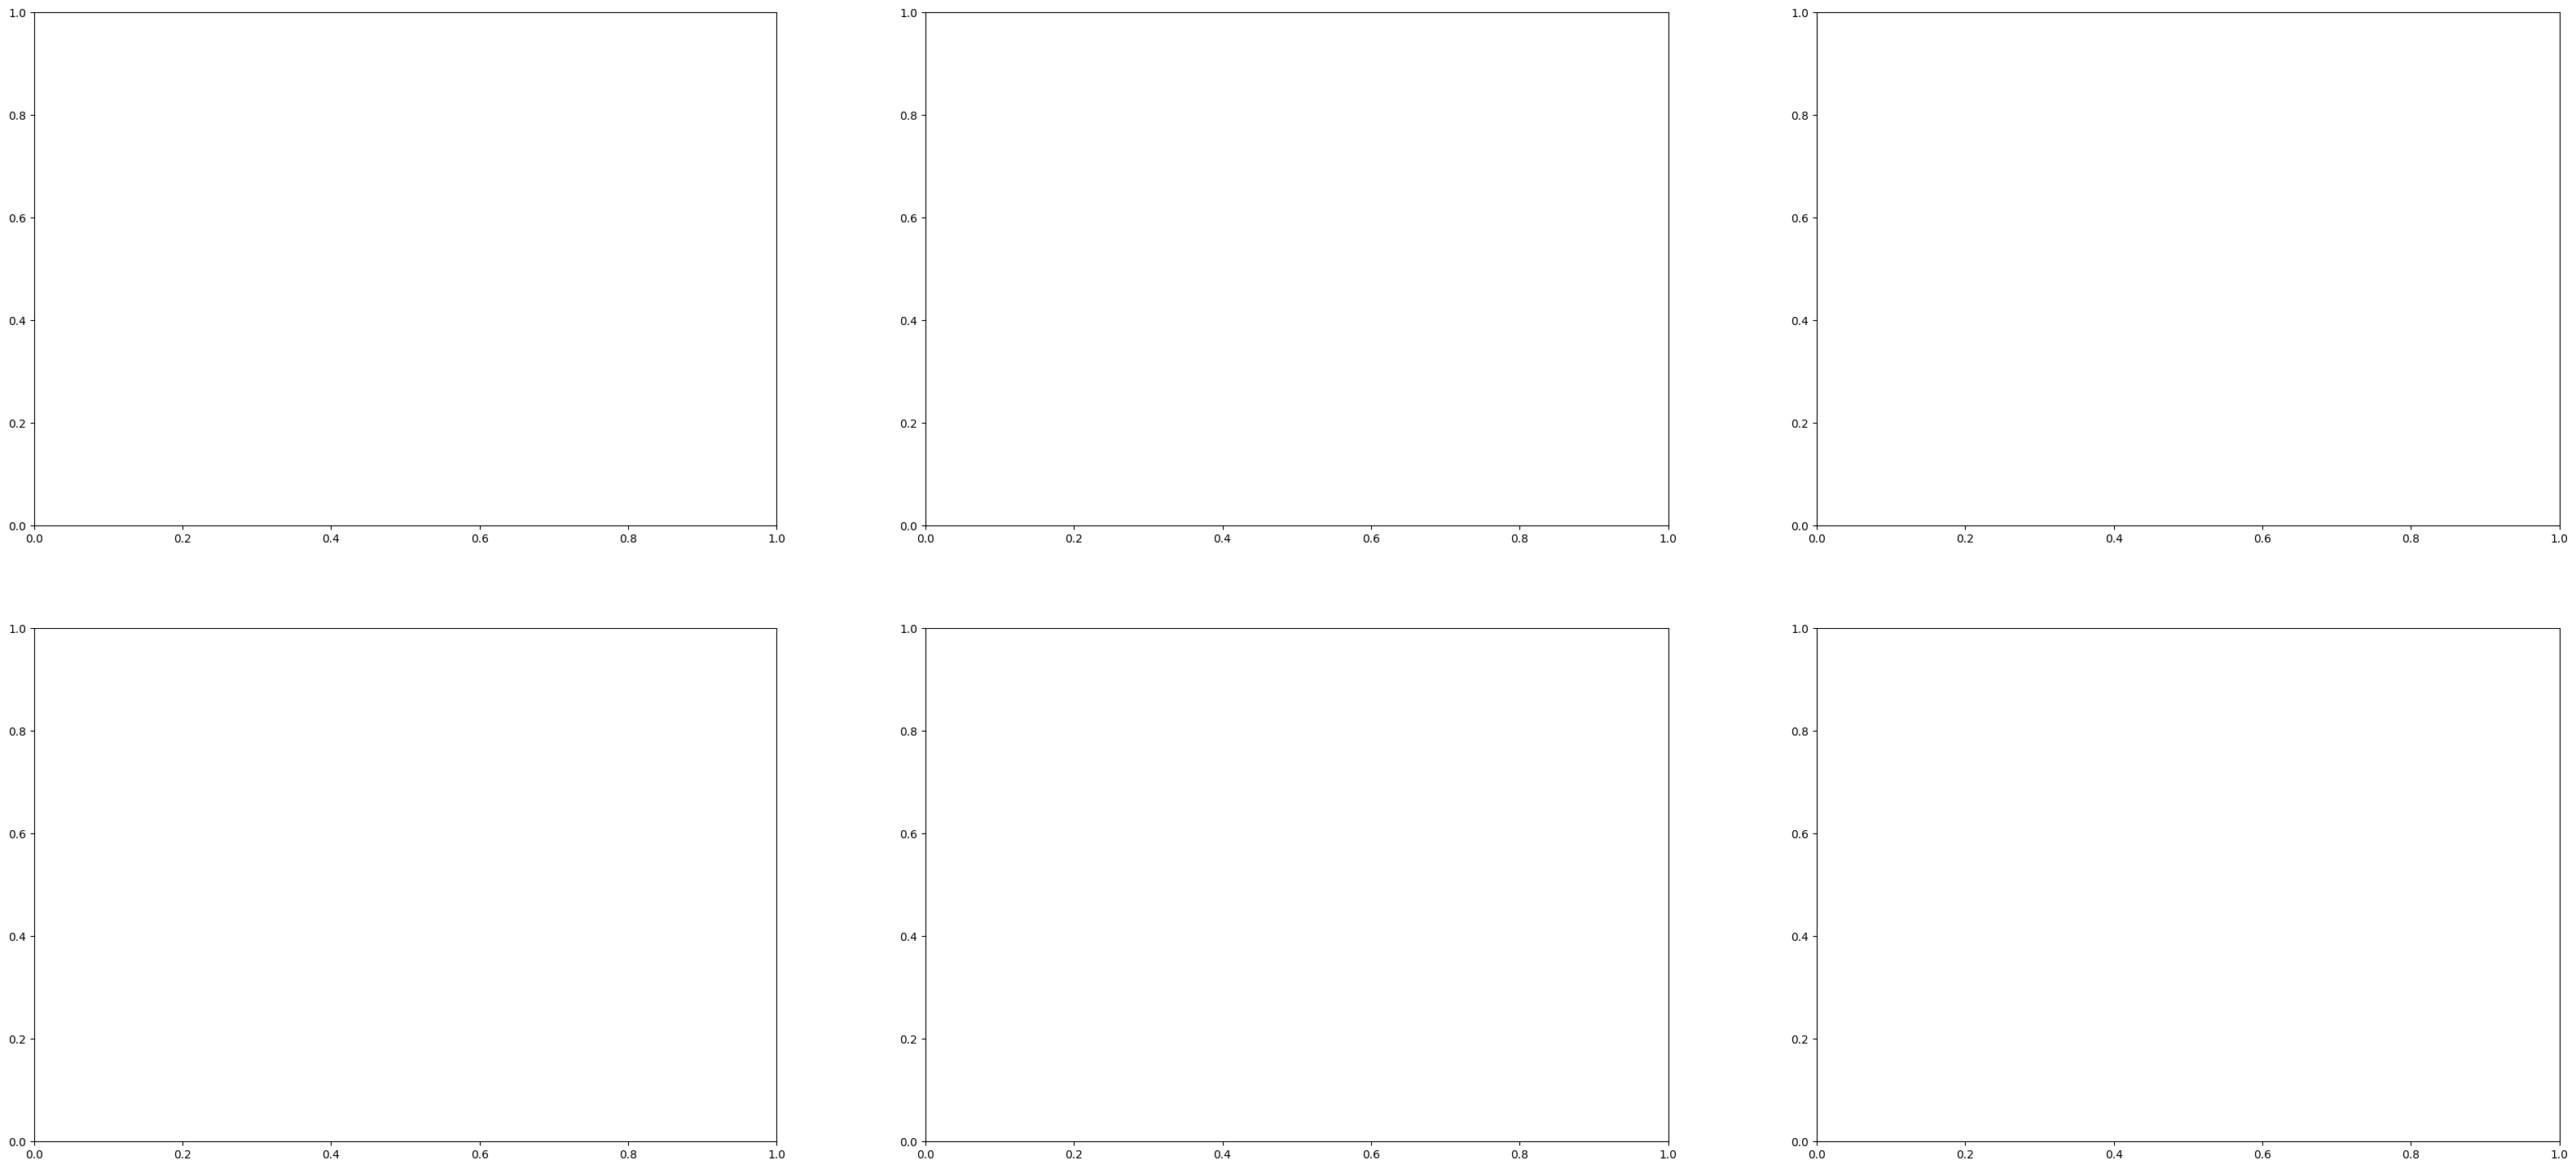

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the plot
num_plots = 5
num_cols = 3  # Number of columns
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate the number of rows needed
fig, axs = plt.subplots(num_rows, num_cols, figsize=(40, 18))  # Adjust figsize for better layout
# Flatten the axs array for easy iteration
axs = axs.flatten()

# Loop through the data dictionary to create each plot
for ax, (key, values) in zip(axs, df.items()):
    # Melt the DataFrame to have metrics as one column for Seaborn
    values = values.T
    
    # Extract the part before the last underscore for x-tick labels
    x_labels = values.index.str.rsplit('_', n=1).str[:-1].str.join('_')
    
    # Remove duplicates while preserving order
    x_labels_unique = set(x_labels[x_labels.isin(x_labels.unique())])

    # Create a bar plot for the melted DataFrame
    sns.barplot(data=values, x=x_labels, y=values['sum'], hue=values['mtd_interval'], ax=ax)
    
    # Set the title
    ax.set_title(key, fontsize=16)
    
    # Rotate x-tick labels by 45 degrees
    ax.set_xticks(range(len(x_labels_unique)))  # Set ticks to match the number of unique x-ticks
    ax.set_xticklabels(x_labels_unique, rotation=45, fontsize=8)
    ax.legend_.remove()

# Hide the last subplot if needed
if num_plots < len(axs):
    axs[num_plots].axis('off')  # Turn off the last subplot

# Set global labels for the figure
fig.text(0.5, 0.04, 'Metrics', ha='center', fontsize=14)
fig.text(0.04, 0.5, 'Overall Score', va='center', rotation='vertical', fontsize=14)


# Create a global legend
handles, labels = axs[0].get_legend_handles_labels()  # Get handles and labels from the first subplot

# Convert labels to integers (if they are numerical and can be converted)
# This example assumes that labels are strings representing integers.
# Adjust the conversion logic if your labels have a different format.
rounded_labels = [str(int(float(label))) for label in labels]  # Convert labels to integers

# Create the global legend using the rounded labels
fig.legend(handles, rounded_labels, title='MTD interval', loc='upper center', ncol=num_cols, fontsize=14)


# Show the plots
plt.tight_layout(rect=[0.05, 0.05, 0.975, 0.95])  # Adjust layout to make room for global labels
plt.savefig("mtd_interval_effect.png")
plt.show()


# Data Processing and Visualization (Network Size)

In [ ]:
mtd_interval = 50
network_sizes = [100,150,200]
# metrics = ["all_features"]

In [ ]:
all_model_data = pd.DataFrame()
for network_size in network_sizes:
    # Create an empty DataFrame to store all the data for all metrics
    all_model_data_set = pd.DataFrame()

    for metric in metrics:
        models = [
        
            f"{metric}_CompleteTopologyShuffle",
            f"{metric}_IPShuffle",
        
            f"{metric}_OSDiversity",
            f"{metric}_ServiceDiversity",
            metric,
        ]
        
            
        # Initialize the chart for the current model
        chart = StackedBarChart(metric, epsilon, start_time, finish_time, mtd_interval, network_size, total_nodes, new_network, "overview", trial, result_head_path)
        weights = {'ASR': 1, 'time_to_compromise': 1, 'attack_path_exposure': 1, "ROA": 1, "risk": 1}  # Custom weights
        
        # Get data for current model
        schemes_data = pd.DataFrame(chart.multiple_scaled_pipeline(models, run_trial=False))


        
        
        # Concatenate the current schemes_data to all_model_data along the columns (axis=1)
        if all_model_data_set.empty:
            all_model_data_set = schemes_data
        else:
            all_model_data_set = pd.concat([all_model_data_set, schemes_data], axis=1)

    all_model_data = pd.concat([all_model_data, all_model_data_set], axis=1)



In [ ]:
def get_mtd_set(data):
    sets = {}
    mtd_schemes = [
        "CompleteTopologyShuffle",
        "IPShuffle",
        "OSDiversity",
        "ServiceDiversity",
        "AnyMTD"
    ]

    # Create a combined regex pattern for the MTD schemes
    mtd_regex = '|'.join(mtd_schemes)

    # Loop through the MTD schemes and filter matching columns
    for mtd in mtd_schemes:
        metric_data = data.filter(regex=mtd)  # Filter columns matching the MTD scheme
        sets[mtd] = metric_data  # Store filtered data in sets dictionary with MTD scheme as key

    # Filter the columns that do NOT match any of the MTD schemes
    # Filter the columns that contain any of the MTD schemes
    excluded_data = data.filter(regex=f'^(?!.*({mtd_regex})).*', axis=1)

    # Add suffix '_all_mtd' to all columns in the excluded_data DataFrame
    excluded_data = excluded_data.rename(columns=lambda x: f"{x}_AnyMTD")
    # Store the excluded data (non-MTD scheme columns) in the sets dictionary
    sets['AnyMTD'] = excluded_data

    return sets

In [ ]:
all_model_data = all_model_data.T[[ "ROA", "risk", "ASR", "attack_path_exposure","MEF","network_size"]]
all_model_data['sum'] = all_model_data[[  "ASR","attack_path_exposure","ROA", "risk",]].sum(axis=1)

In [ ]:
# all_model_data = all_model_data.T

In [ ]:
data = {}

In [ ]:
for network_size in network_sizes:
    network_data = all_model_data[all_model_data['network_size'] == network_size].T
    data[f"network_size_{network_size}"] = get_mtd_set(network_data)

In [ ]:
data

{'network_size_100': {'CompleteTopologyShuffle':                       all_features_CompleteTopologyShuffle  \
  ROA                                               1.142126   
  risk                                              1.069299   
  ASR                                               1.905306   
  attack_path_exposure                              2.036256   
  MEF                                               0.006623   
  network_size                                    100.000000   
  sum                                               6.152987   
  
                        hybrid_CompleteTopologyShuffle  \
  ROA                                         1.087080   
  risk                                        1.058448   
  ASR                                         1.899147   
  attack_path_exposure                        2.064735   
  MEF                                         0.006623   
  network_size                              100.000000   
  sum                           

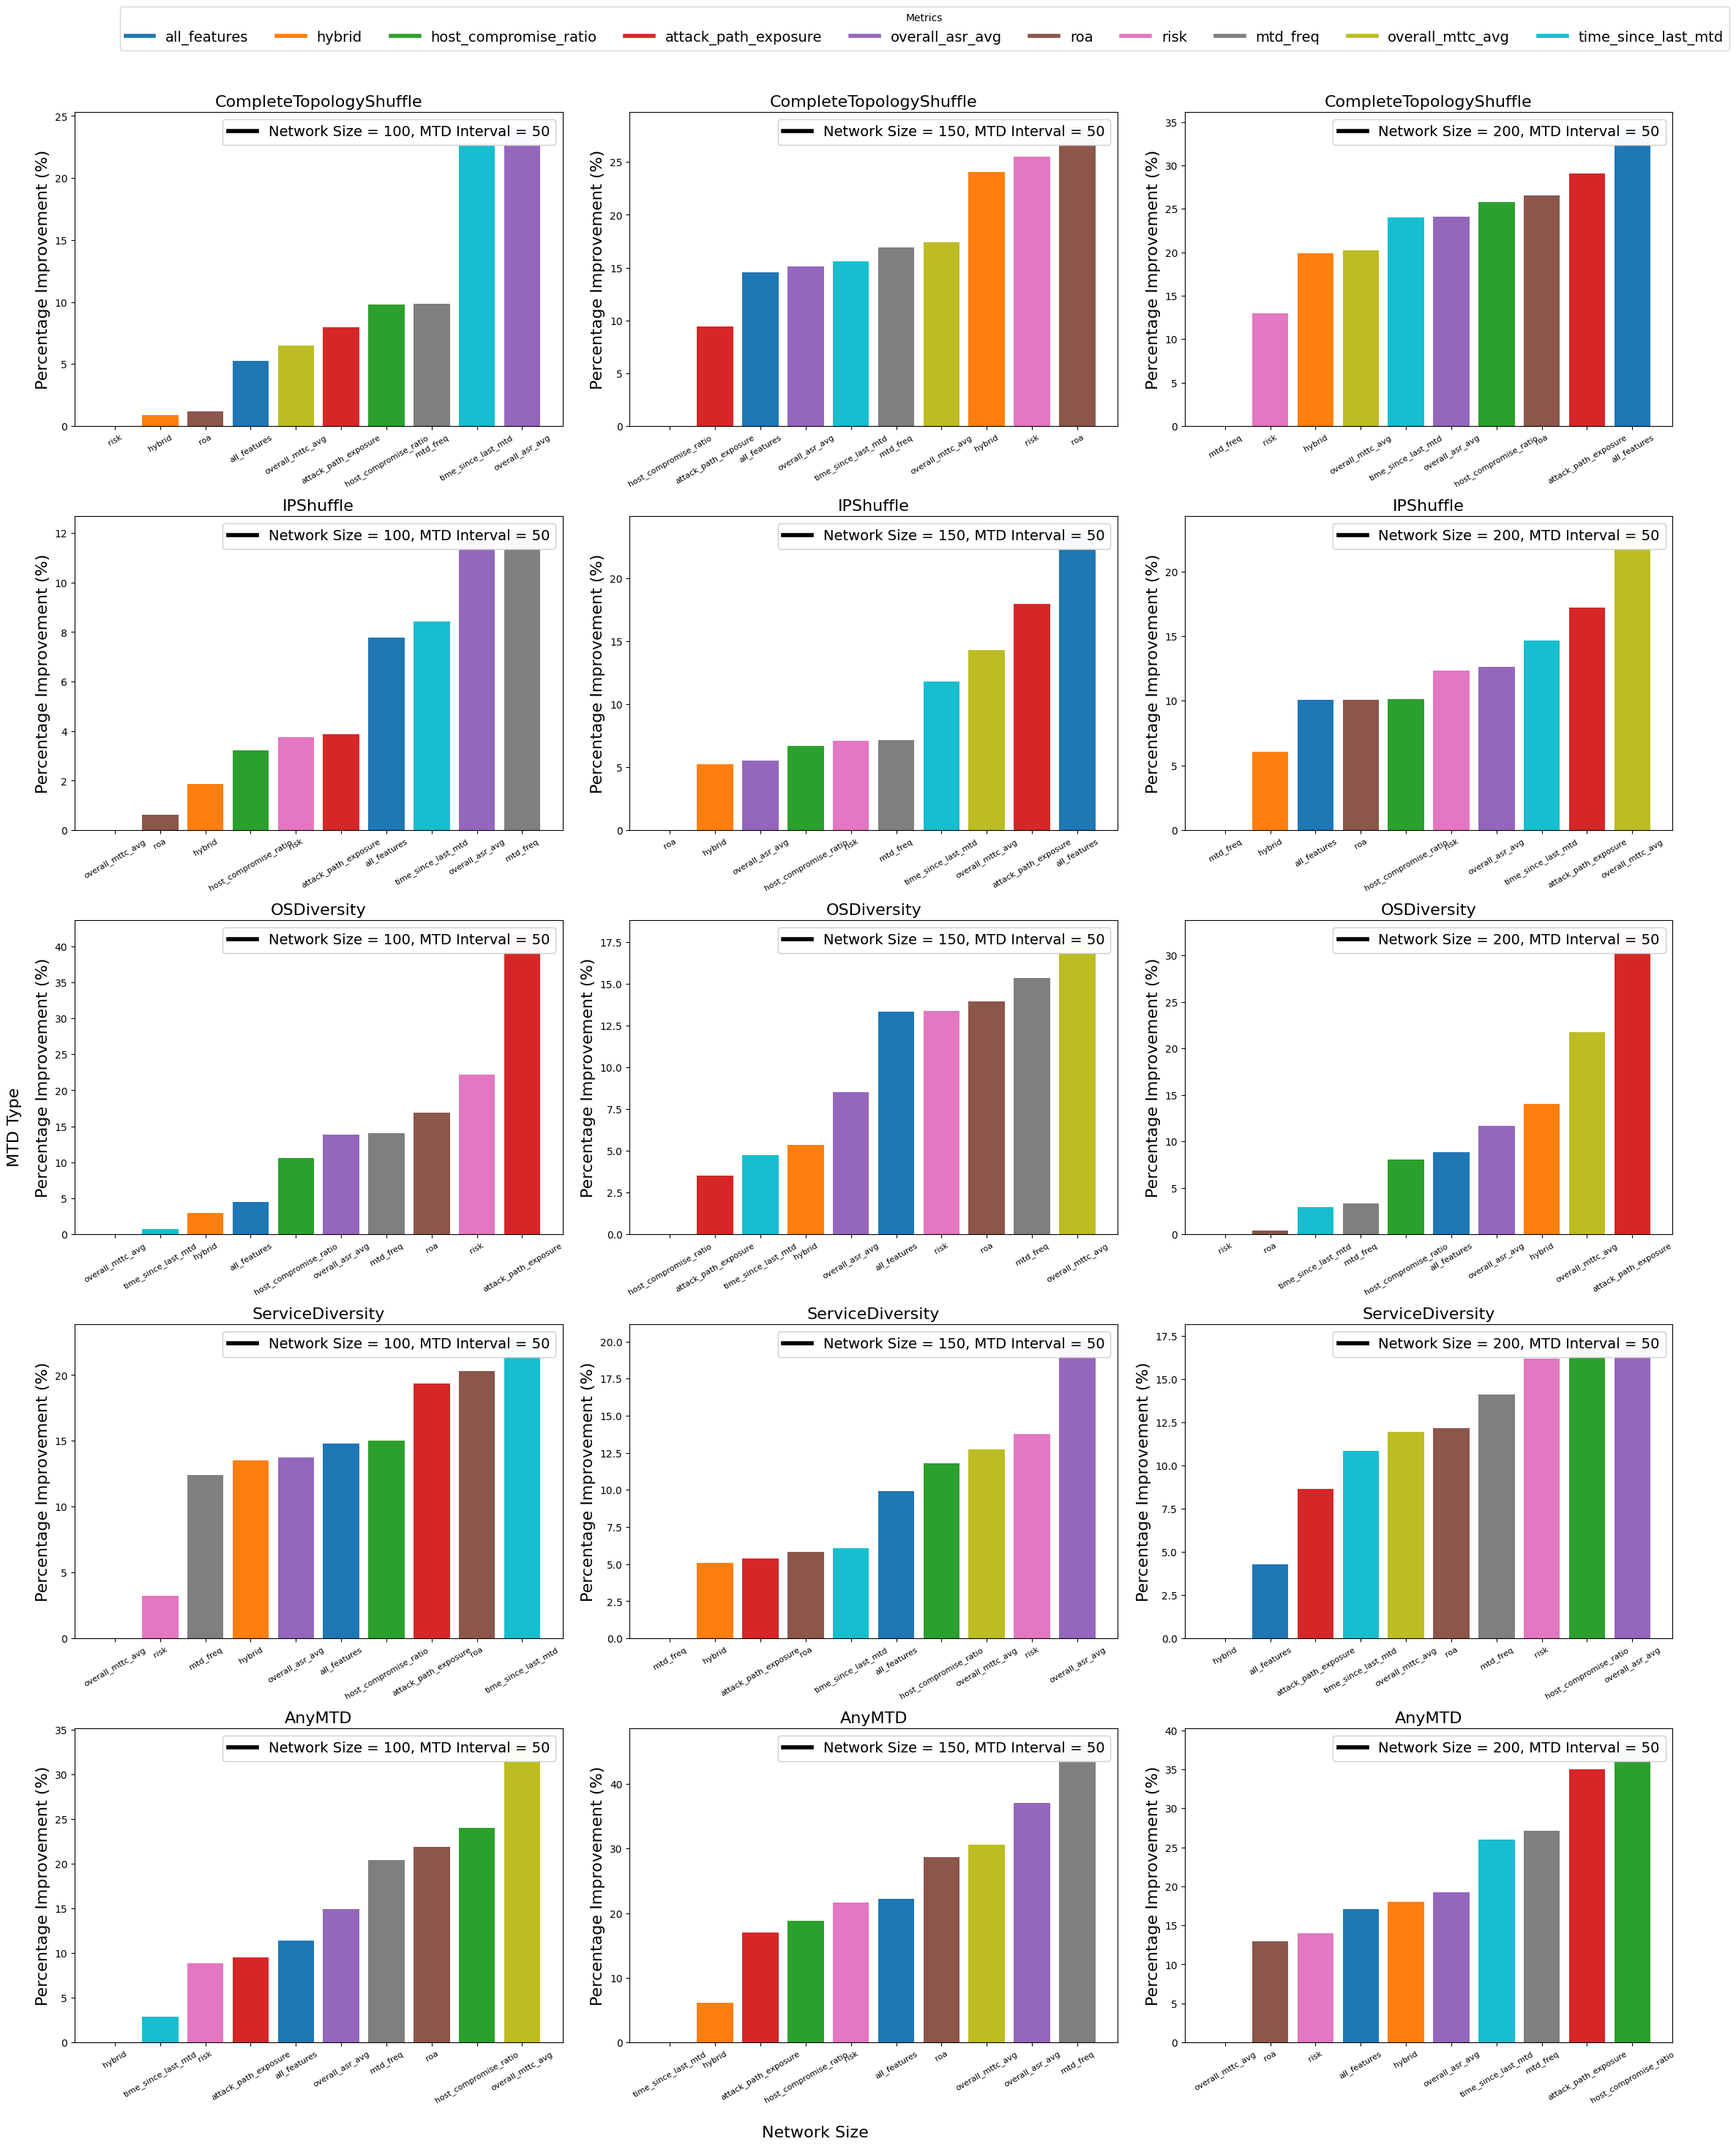

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D  # Import Line2D for custom legend handles

# Define a color mapping for the metrics
color_mapping = {
    "all_features": "#1f77b4",       # Blue
    "hybrid": "#ff7f0e",             # Orange
    "host_compromise_ratio": "#2ca02c",  # Green
    "attack_path_exposure": "#d62728",   # Red
    "overall_asr_avg": "#9467bd",         # Purple
    "roa": "#8c564b",                    # Brown
    "risk": "#e377c2",                   # Pink
    "mtd_freq": "#7f7f7f",               # Grey
    "overall_mttc_avg": "#bcbd22",      # Yellow-Green
    "time_since_last_mtd": "#17becf"     # Cyan
}

num_rows = 5  # Set rows and columns for transposed layout (swapped)
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(24, 30))  # Larger figsize for better visibility

# Initialize a subplot index
subplot_idx = 0

# Create a set to store unique metric labels used across all subplots
unique_labels_set = set()

# Iterate over each network_size to create a stacked bar plot
for network_size in network_sizes:
    # Iterate through the mtd data
    for mtd in data[f'network_size_{network_size}']:
        # Transpose the subplot arrangement: calculate row and col in transposed order
        row = subplot_idx % num_rows
        col = subplot_idx // num_rows
        
        # Check to avoid out-of-bounds error
        if col < num_cols:
            data_copy = data[f'network_size_{network_size}'][mtd].drop("network_size", axis=0)

            mtd_data = data_copy.filter(regex=mtd).T.sort_values(by='sum').T
            mtd_data = mtd_data.T['sum'].T  # Filter data for the current mtd
 
            # Modify x-tick labels: Remove the last part after the last underscore
            modified_labels = ['_'.join(label.split('_')[:-1]) for label in mtd_data.index]
            colors = [color_mapping[label] for label in modified_labels if label in color_mapping]

            # Extract and normalize the values
            values = mtd_data.values  # Extract values to plot
            normalized_values = (values - np.min(values))  *100 # Normalize by sum

            # Create the bar plot
            bars = axes[row, col].bar(modified_labels, normalized_values, color=colors)

            # Add labels and title for each subplot
            axes[row, col].set_ylabel('Percentage Improvement (%)', fontsize=16)
            axes[row, col].set_title(f'{mtd}', fontsize=16)

            # Rotate the x-axis labels by 30 degrees for better readability
            axes[row, col].tick_params(axis='x', rotation=30)

            # Set x-tick labels with a smaller font size
            axes[row, col].set_xticklabels(modified_labels, fontsize=8)

            # Add labels to the unique set for the global legend
            unique_labels_set.update(modified_labels)

            # Create a custom black label for the legend
            black_label = Line2D([0], [0], color='black', lw=4)

            # Add the first legend for the network size with a black label
            black_label = Line2D([0], [0], color='black', lw=4)
            network_size_legend = axes[row, col].legend(
                [black_label], [f'Network Size = {network_size}, MTD Interval = {50}'], loc='upper right',
                fontsize=14, bbox_to_anchor=(1, 1)  # Position at the top-right corner
            )

        

            # Add both legends to the current axis by using add_artist method
            axes[row, col].add_artist(network_size_legend)  # Add the first legend manually

            # Increment the subplot index
            subplot_idx += 1

# Prepare global legend handles
unique_labels = color_mapping.keys()
legend_handles = [Line2D([0], [0], color=color_mapping.get(label, "#000000"), lw=4) for label in unique_labels]

# Add the global legend closer to the subplots (adjust bbox_to_anchor)
fig.legend(legend_handles, unique_labels, title="Metrics", loc="center left", ncol=len(color_mapping), bbox_to_anchor=(0.1, 1), fontsize=14)

# Add overall x-label and y-label
fig.text(0.5, 0.04, 'Network Size', ha='center', fontsize=16)  # X-axis label
fig.text(0.04, 0.5, 'MTD Type', va='center', rotation='vertical', fontsize=16)  # Y-axis label

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0.05, 0.05, 1, 0.975])  # Adjust layout to make room for the global legend
plt.savefig("network_size_sets_rank.png")
# Show the plots
plt.show()


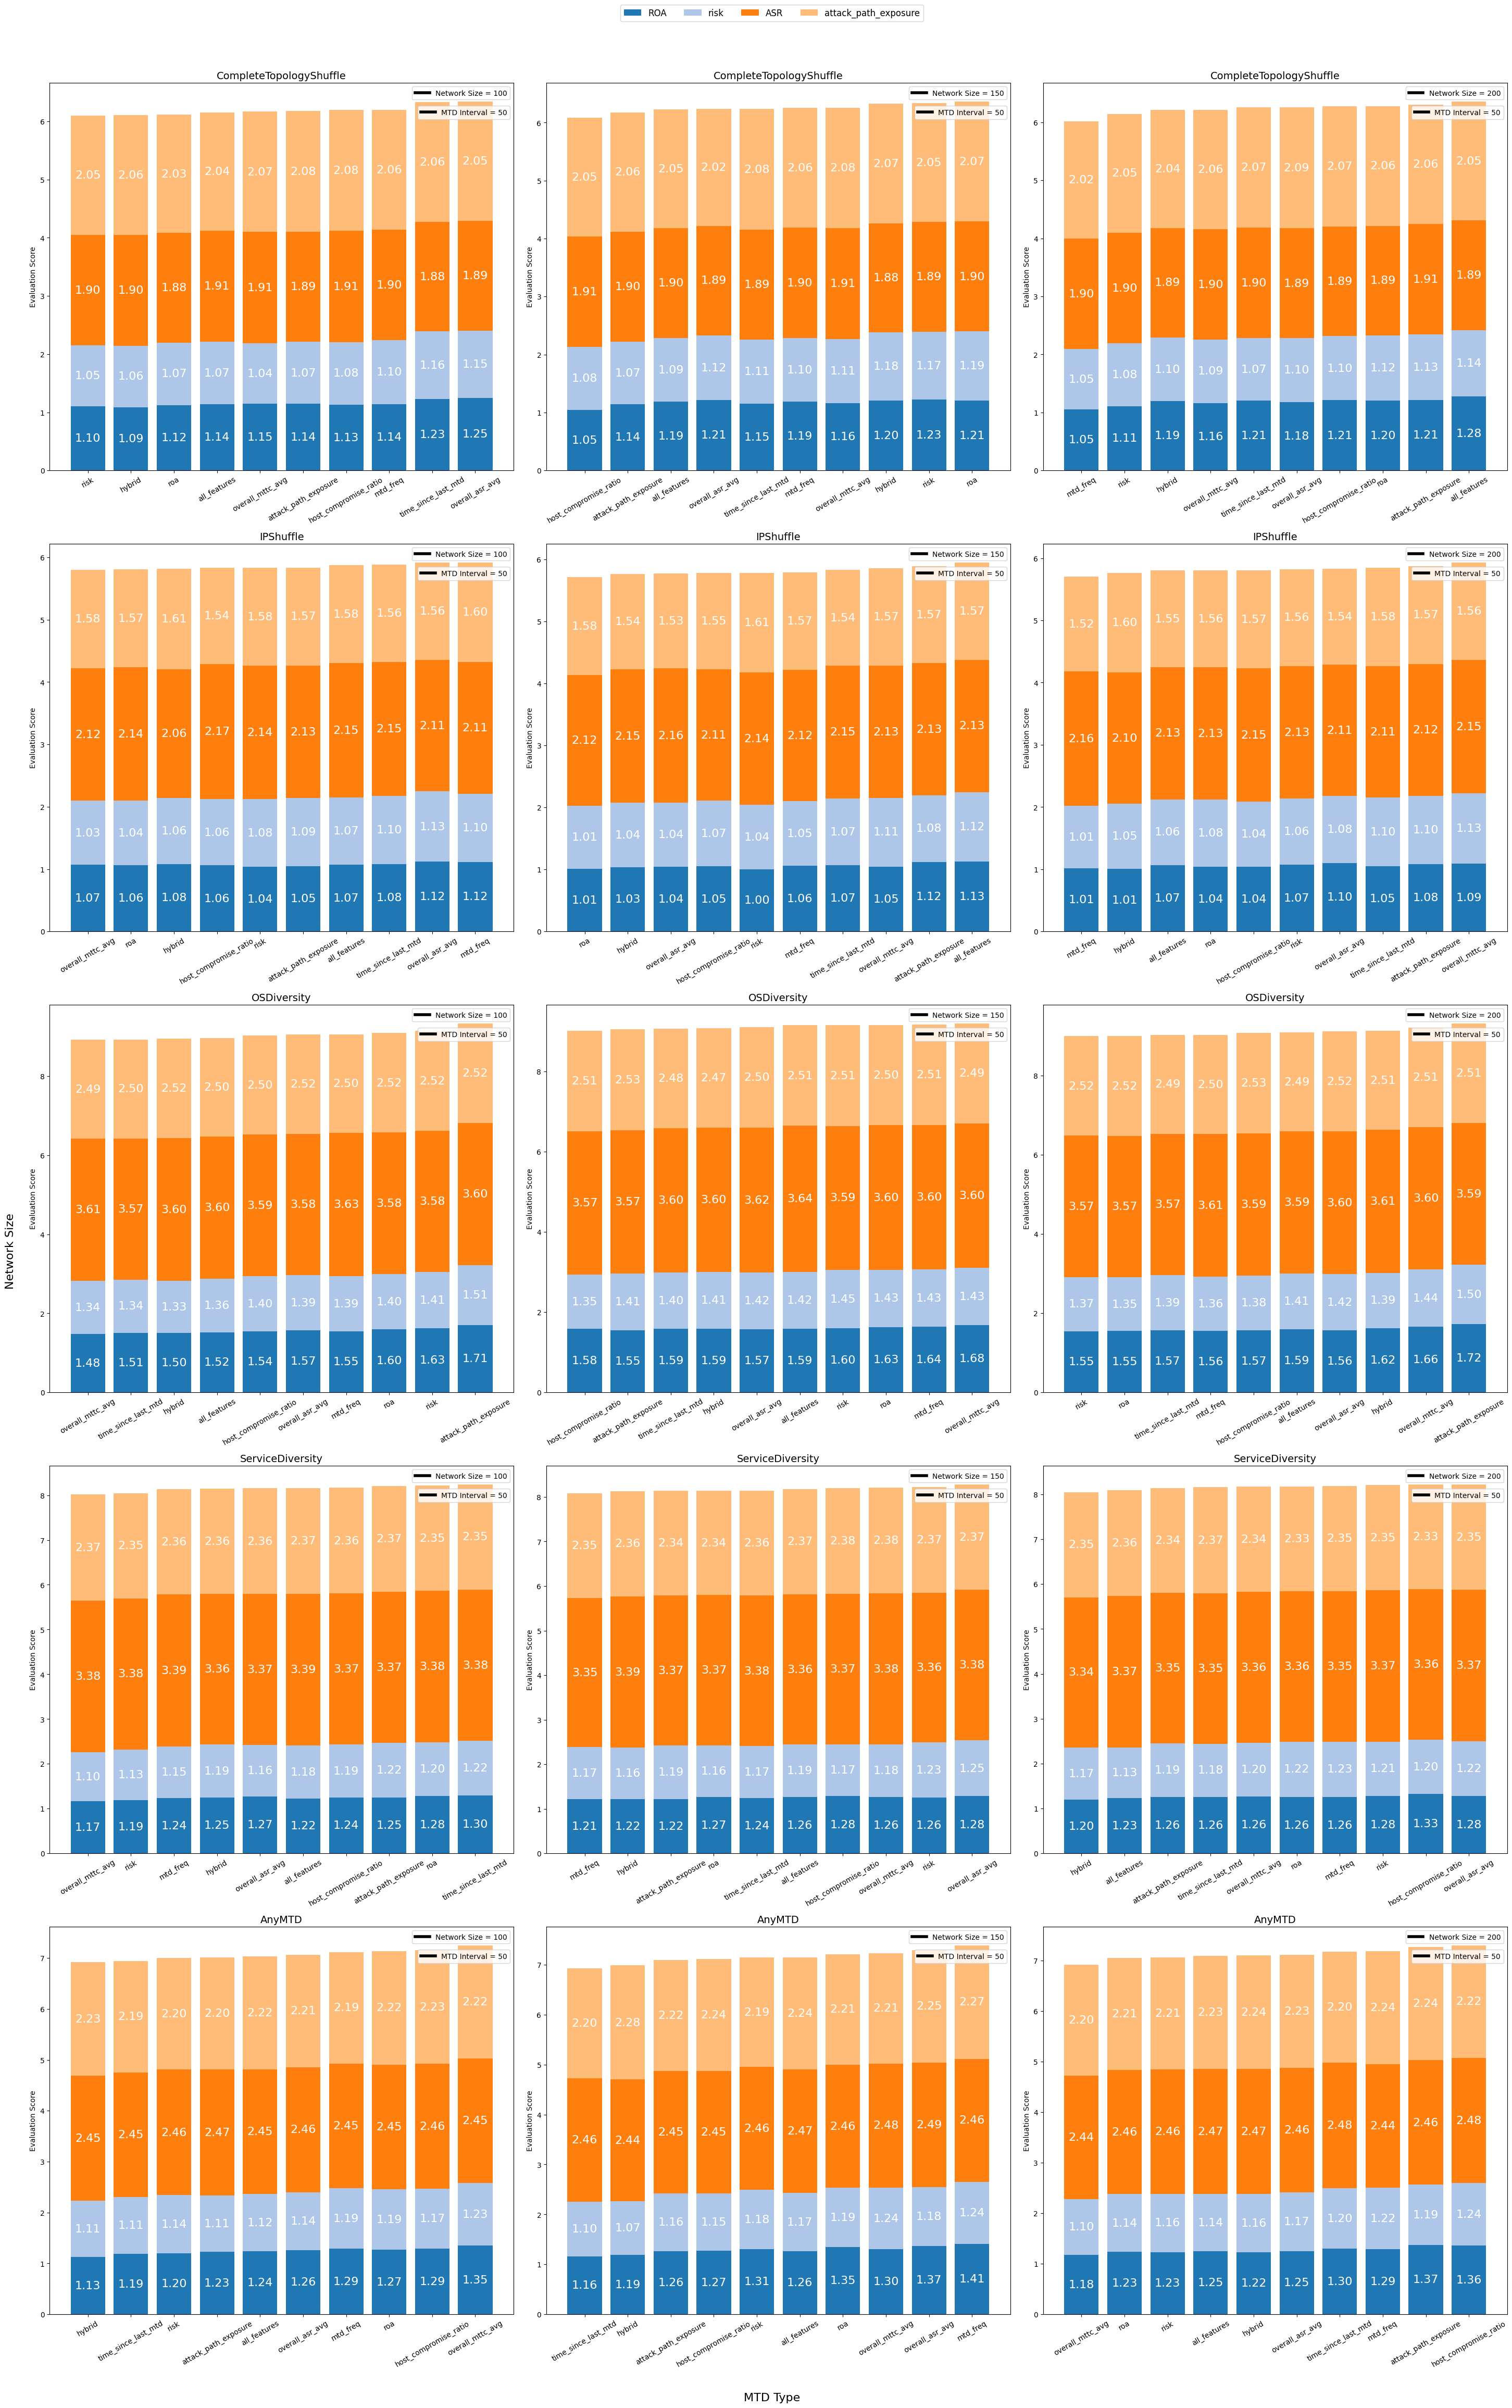

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D  # Import Line2D for custom legend handles

# Set the transposed number of rows and columns
num_rows = 5  # Increase rows as the layout is transposed
num_cols = 3  # Fewer columns

fig, axes = plt.subplots(num_rows, num_cols, figsize=(32, 48))  # Adjusted figsize for new layout

# Initialize a subplot index
subplot_idx = 0

# For global MTD type legend
mtd_type_handles = []

# Iterate over each network_size to create a stacked bar plot
for network_size in network_sizes:
    # Iterate through the MTD data
    for mtd in data[f'network_size_{network_size}']:
        # Calculate the current row and column index for the subplot (transpose: rows are now the columns)
        col = subplot_idx // num_rows  # Column corresponds to index division by rows
        row = subplot_idx % num_rows   # Row corresponds to the index remainder
        
        # Check to avoid out-of-bounds error
        if col < num_cols:
            data_copy = data[f'network_size_{network_size}'][mtd].drop("network_size", axis=0)

            mtd_data = data_copy.filter(regex=mtd).T.sort_values(by='sum').T
            mtd_data = mtd_data.drop(["sum", "MEF"]).T  # Filter data for the current MTD

            # Extract MTD names and values for plotting
            mtd_names = mtd_data.columns  # Extract MTD names
            values = mtd_data.values  # Extract values to plot

            # Create a stacked bar plot
            bottom = np.zeros(len(mtd_data))  # Initialize bottom to stack bars
            colors = plt.cm.tab20.colors  # Get colors for each MTD
            
            for i, mtd_name in enumerate(mtd_names):
                bars = axes[row, col].bar(mtd_data.index, values[:, i], 
                                           label=mtd_name, color=colors[i % len(colors)], bottom=bottom)
                
                # Annotate the bars with the value
                for j, bar in enumerate(bars):
                    height = bar.get_height()
                    axes[row, col].text(bar.get_x() + bar.get_width() / 2., bottom[j] + height / 2, 
                                        f'{height:.2f}', ha='center', va='center', fontsize=16, color='white')
                
                bottom += values[:, i]  # Update bottom for stacking

                # Collect handles for global legend (first subplot only)
                if subplot_idx == 0:
                    mtd_type_handles.append(bars[0])

            # Add labels and title for each subplot
            axes[row, col].set_ylabel('Evaluation Score', fontsize=10)
            axes[row, col].set_title(f'{mtd}', fontsize=14)

            # Rotate the x-axis labels by 30 degrees for better readability
            axes[row, col].tick_params(axis='x', rotation=30)

            # Modify x-tick labels: Remove the last part after the last underscore
            modified_labels = ['_'.join(label.split('_')[:-1]) for label in mtd_data.index]
            axes[row, col].set_xticklabels(modified_labels, fontsize=10)  # Set smaller font size for x-axis labels
            
            # Add the first legend for the network size with a black label
            black_label = Line2D([0], [0], color='black', lw=4)
            network_size_legend = axes[row, col].legend(
                [black_label], [f'Network Size = {network_size}'], loc='upper right',
                fontsize=10, bbox_to_anchor=(1, 1)  # Position at the top-right corner
            )

            # Add the second legend for the MTD interval, positioned slightly below the first one
            mtd_interval_label = Line2D([0], [0], color='black', lw=4)  # Customize the color/line style as needed
            mtd_interval_legend = axes[row, col].legend(
                [mtd_interval_label], [f'MTD Interval = {50}'], loc='upper right',
                fontsize=10, bbox_to_anchor=(1, 0.95)  # Slightly lower than the first legend
            )

            # Add both legends to the current axis by using add_artist method
            axes[row, col].add_artist(network_size_legend)  # Add the first legend manually
            
            # Increment the subplot index
            subplot_idx += 1

# Add global legend for MTD types outside of subplots
fig.legend(mtd_type_handles, mtd_names, loc='upper center', bbox_to_anchor=(0.5, 1), ncol=len(mtd_names), fontsize=12)

# Add overall x-label and y-label
fig.text(0.5, 0.04, 'MTD Type', ha='center', fontsize=16)  # X-axis label
fig.text(0.04, 0.5, 'Network Size', va='center', rotation='vertical', fontsize=16)  # Y-axis label

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0.05, 0.05, 0.95, 0.975])  # Adjust layout to make room for labels
plt.savefig("network_size_sets_score.png")
plt.show()


In [ ]:
data_metrics = data.copy()
for network_size in network_sizes:
    network_data = all_model_data[all_model_data['network_size'] == network_size].T
    data[f"network_size_{network_size}"] = get_metrics_set(network_data)

In [ ]:
# Initialize an empty list to store the results
results = []

# Loop through the MTD intervals and metrics schemes
for network_size in network_sizes:
    for metric in metrics_schemes:
        mean_value = data[f'network_size_{network_size}'][metric].T['sum'].mean()
        std_value = data[f'network_size_{network_size}'][metric].T['sum'].std()
        
        # Append the results as a dictionary to the list
        results.append({
            'Metric': metric,
            'Network Size': network_size,
            'Mean': mean_value,
            'Standard Deviation': std_value
        })

# Create a DataFrame from the results list
results_df = pd.DataFrame(results)
# Set the 'Metric' column as the index
results_df.set_index('Metric', inplace=True)

In [ ]:
results_df

,Network Size,Mean,Standard Deviation
Metric,,,
all_features,100,7.237683,1.315464
hybrid,100,7.188736,1.337437
host_compromise_ratio,100,7.275613,1.334726
attack_path_exposure,100,7.314798,1.453724
overall_asr_avg,100,7.306824,1.295809
roa,100,7.271968,1.389407
risk,100,7.226454,1.378612
mtd_freq,100,7.287782,1.319082
overall_mttc_avg,100,7.230111,1.290512


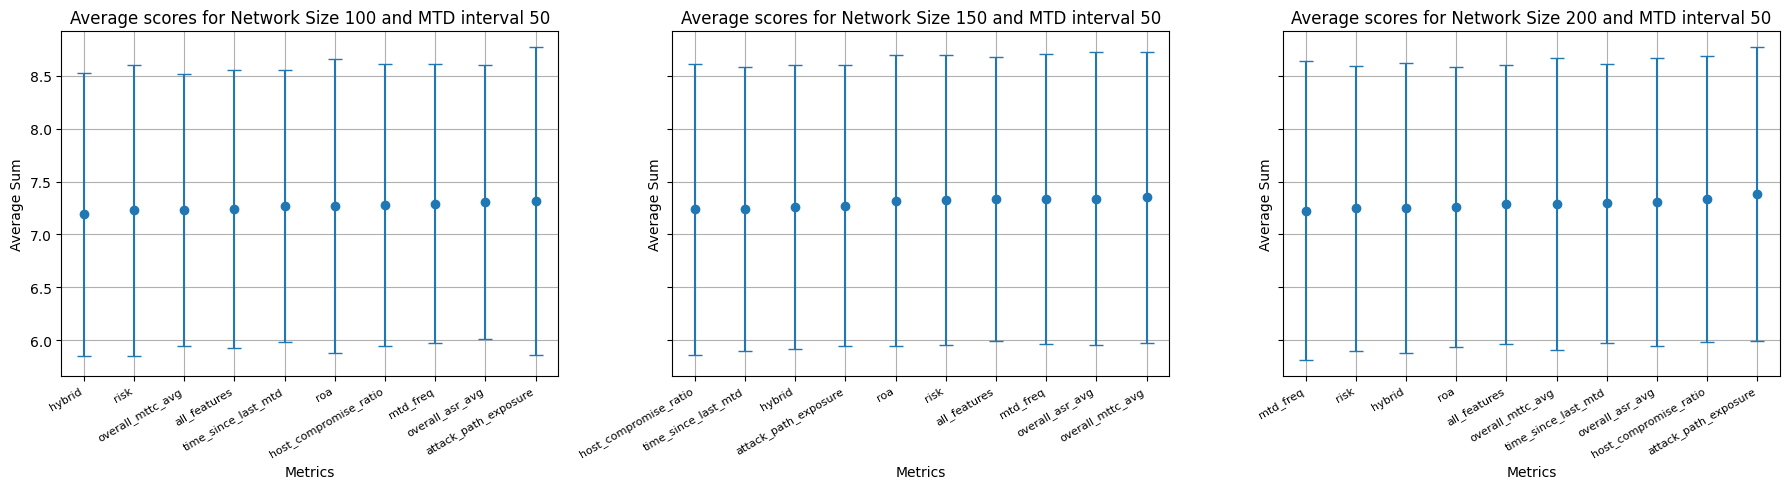

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt



# Create a figure with subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

# List of unique intervals
intervals = results_df['Network Size'].unique()
# Collect handles and labels for the legend
handles = []
labels = []
# Iterate through each subplot
for i, network_size in enumerate(intervals):
    # Filter DataFrame for the current MTD Interval
    df_subset = results_df[results_df['Network Size'] == network_size]
    
    # Sort by mean in ascending order
    df_subset = df_subset.sort_values(by='Mean')
    
    # Plotting mean with error bars
    handle = axs[i].errorbar(df_subset.index, df_subset['Mean'], 
                             yerr=df_subset['Standard Deviation'], 
                             fmt='o', label=f'Network Size {network_size}', capsize=5)
    
    # Store handle and label for the legend
    handles.append(handle[0])  # Add the first element of the handle
    labels.append(f'Network Size {network_size}')

    # Set titles and labels
    axs[i].set_title(f'Average scores for Network Size {network_size} and MTD interval {50}')
    axs[i].set_xlabel('Metrics')
    axs[i].set_ylabel('Average Sum')
    axs[i].grid(True)
    axs[i].set_xticklabels(df_subset.index, rotation=30, ha='right', fontsize=8)



# Adjust layout to prevent overlap
plt.tight_layout()
plt.savefig("network_size_effect.png")
plt.show()

In [ ]:
# metrics = ["all_features"]
network_sizes = [100,150,200]

In [ ]:
all_model_data = pd.DataFrame()
for network_size in network_sizes:
    # Create an empty DataFrame to store all the data for all metrics
    all_model_data_set = pd.DataFrame()

    for metric in metrics:
        models = [
        
            f"{metric}_CompleteTopologyShuffle",
            f"{metric}_IPShuffle",
        
            f"{metric}_OSDiversity",
            f"{metric}_ServiceDiversity",
            metric,
        ]
        
            
        # Initialize the chart for the current model
        chart = StackedBarChart(metric, epsilon, start_time, finish_time, mtd_interval, network_size, total_nodes, new_network, "overview", trial, result_head_path)
        weights = {'ASR': 1, 'time_to_compromise': 1, 'attack_path_exposure': 1, "ROA": 1, "risk": 1}  # Custom weights
        
        # Get data for current model
        schemes_data = pd.DataFrame(chart.multiple_scaled_pipeline(models, run_trial=False))


        
        
        # Concatenate the current schemes_data to all_model_data along the columns (axis=1)
        if all_model_data_set.empty:
            all_model_data_set = schemes_data
        else:
            all_model_data_set = pd.concat([all_model_data_set, schemes_data], axis=1)

    all_model_data = pd.concat([all_model_data, all_model_data_set], axis=1)
all_model_data = all_model_data.T[[ "ROA", "risk", "ASR", "attack_path_exposure","MEF","network_size"]]
# Add suffix '_all_mtd' to all columns in the excluded_data DataFrame
# Rename columns in the excluded_data DataFrame to include the suffix '_AnyMTD'

all_model_data['sum'] = all_model_data[[  "ASR","attack_path_exposure","ROA", "risk",]].sum(axis=1)


In [ ]:
all_model_data 

,ROA,risk,ASR,attack_path_exposure,MEF,network_size,sum
all_features_CompleteTopologyShuffle,1.142126,1.069299,1.905306,2.036256,0.006623,100.0,6.152987
all_features_IPShuffle,1.073414,1.073524,2.154100,1.575545,0.006625,100.0,5.876583
all_features_OSDiversity,1.515347,1.357048,3.597857,2.497312,0.009917,100.0,8.967564
all_features_ServiceDiversity,1.224292,1.182944,3.386157,2.369640,0.009927,100.0,8.163033
all_features,1.239071,1.123118,2.449579,2.216479,0.009343,100.0,7.028247
...,...,...,...,...,...,...,...
time_since_last_mtd_CompleteTopologyShuffle,1.209013,1.071212,1.904789,2.071980,0.006623,200.0,6.256994
time_since_last_mtd_IPShuffle,1.050589,1.102647,2.110278,1.583619,0.006625,200.0,5.847132
time_since_last_mtd_OSDiversity,1.571759,1.389022,3.570138,2.493726,0.009917,200.0,9.024646
time_since_last_mtd_ServiceDiversity,1.259271,1.184952,3.347536,2.365842,0.009927,200.0,8.157602


In [ ]:
def get_mtd_set(data):
    sets = {}
    mtd_schemes = [
        "CompleteTopologyShuffle",
        "IPShuffle",
        "OSDiversity",
        "ServiceDiversity",
        "AnyMTD"
    ]

    # Loop through the MTD schemes and filter matching columns
    for mtd in mtd_schemes:
        # Use str.contains to filter columns that contain the substring matching the MTD scheme
        metric_data = data.loc[:, data.columns.str.contains(mtd.strip(), case=False, regex=False)]
        sets[mtd] = metric_data  # Store filtered data in sets dictionary with MTD scheme as key

    # Filter the columns that do NOT match any of the MTD schemes
    # Combine the column names that match MTD schemes for exclusion
    mtd_columns = data.columns[data.columns.str.contains('|'.join(mtd_schemes), case=False, regex=True)]
    excluded_data = data.loc[:, ~data.columns.isin(mtd_columns)]

    # Add suffix '_AnyMTD' to all columns in the excluded_data DataFrame
    excluded_data = excluded_data.rename(columns=lambda x: f"{x}_AnyMTD")
    
    # Store the excluded data (non-MTD scheme columns) in the sets dictionary
    sets['AnyMTD'] = excluded_data

    return sets


In [ ]:
df = get_mtd_set(all_model_data.T)

In [ ]:
df

{'CompleteTopologyShuffle':                       all_features_CompleteTopologyShuffle  \
 ROA                                               1.142126   
 risk                                              1.069299   
 ASR                                               1.905306   
 attack_path_exposure                              2.036256   
 MEF                                               0.006623   
 network_size                                    100.000000   
 sum                                               6.152987   
 
                       hybrid_CompleteTopologyShuffle  \
 ROA                                         1.087080   
 risk                                        1.058448   
 ASR                                         1.899147   
 attack_path_exposure                        2.064735   
 MEF                                         0.006623   
 network_size                              100.000000   
 sum                                         6.109410   
 
         

In [ ]:
# Initialize an empty list to store the results
results = []

# Loop through the MTD intervals and metrics schemes
for network_size in network_sizes:
    for metric in metrics_schemes:
        mean_value = data[f'network_size_{network_size}'][metric].T['sum'].mean()
        std_value = data[f'network_size_{network_size}'][metric].T['sum'].std()
        
        # Append the results as a dictionary to the list
        results.append({
            'Metric': metric,
            'Network Size': network_size,
            'Mean': mean_value,
            'Standard Deviation': std_value
        })

# Create a DataFrame from the results list
results_df = pd.DataFrame(results)
# Set the 'Metric' column as the index
results_df.set_index('Metric', inplace=True)

In [ ]:
results_df[results_df['Network Size'] == 150].sort_values(by="Mean")

,Network Size,Mean,Standard Deviation
Metric,,,
host_compromise_ratio,150,7.239037,1.375824
time_since_last_mtd,150,7.240862,1.345046
hybrid,150,7.256377,1.344515
attack_path_exposure,150,7.271152,1.327827
roa,150,7.318003,1.374314
risk,150,7.327379,1.371138
all_features,150,7.331867,1.341162
mtd_freq,150,7.335982,1.370353
overall_asr_avg,150,7.337290,1.386919


In [ ]:
7.350362 - 7.239037

0.1113249999999999

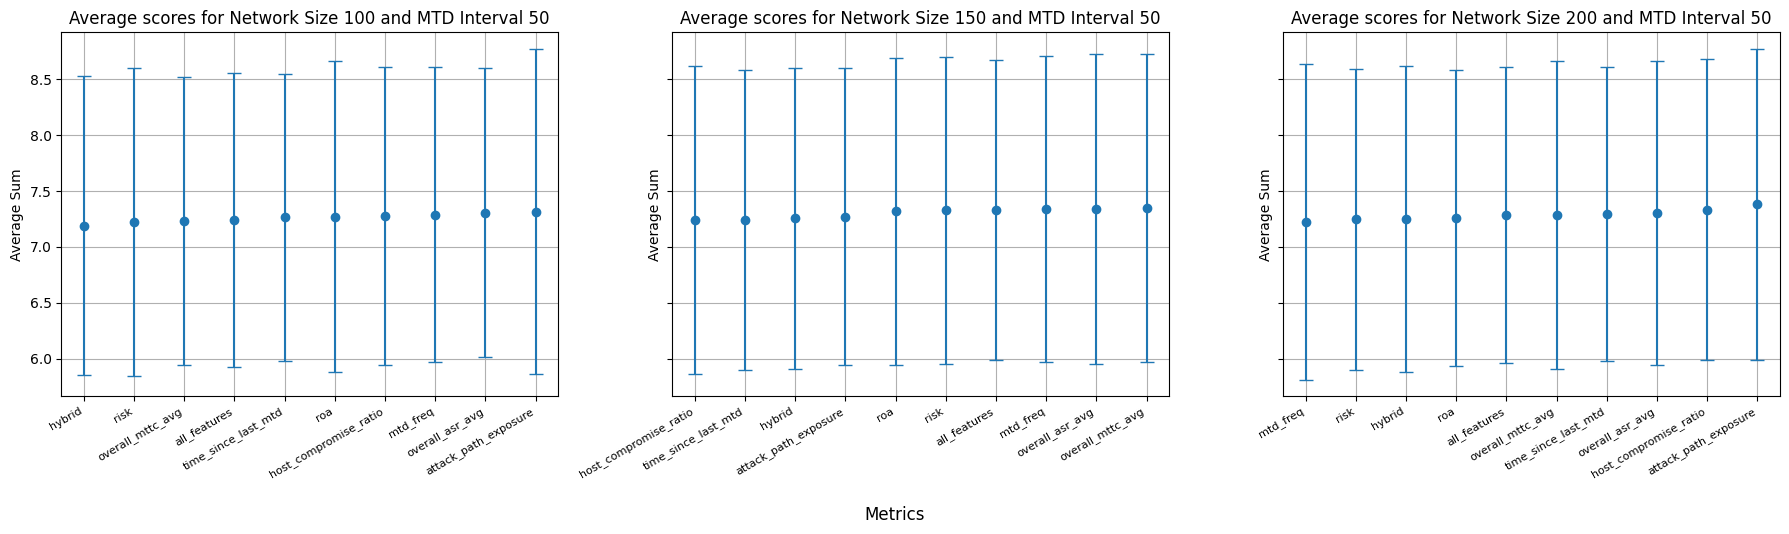

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a figure with subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

# List of unique networks
networks = results_df['Network Size'].unique()
# Collect handles and labels for the legend
handles = []
labels = []
# Iterate through each subplot
for i, network_size in enumerate(networks):
    # Filter DataFrame for the current network_size
    df_subset = results_df[results_df['Network Size'] == network_size]
    
    # Sort by mean in ascending order
    df_subset = df_subset.sort_values(by='Mean')
    
    # Plotting mean with error bars
    handle = axs[i].errorbar(df_subset.index, df_subset['Mean'], 
                             yerr=df_subset['Standard Deviation'], 
                             fmt='o', label=f'network_size {network_size}', capsize=5)
    
    # Store handle and label for the legend
    handles.append(handle[0])  # Add the first element of the handle
    labels.append(f'network_size {network_size}')

    # Set titles and labels for each subplot
    axs[i].set_title(f'Average scores for Network Size {network_size} and MTD Interval {50}')
    axs[i].set_ylabel('Average Sum')
    axs[i].grid(True)
    axs[i].set_xticklabels(df_subset.index, rotation=30, ha='right', fontsize=8)

# Set a global x-label
fig.text(0.5, -0.05, 'Metrics', ha='center', fontsize=12)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.savefig("overall_network_size_effect.png")
plt.show()


12.606181483225853
11.132488695813425
15.512754261723494


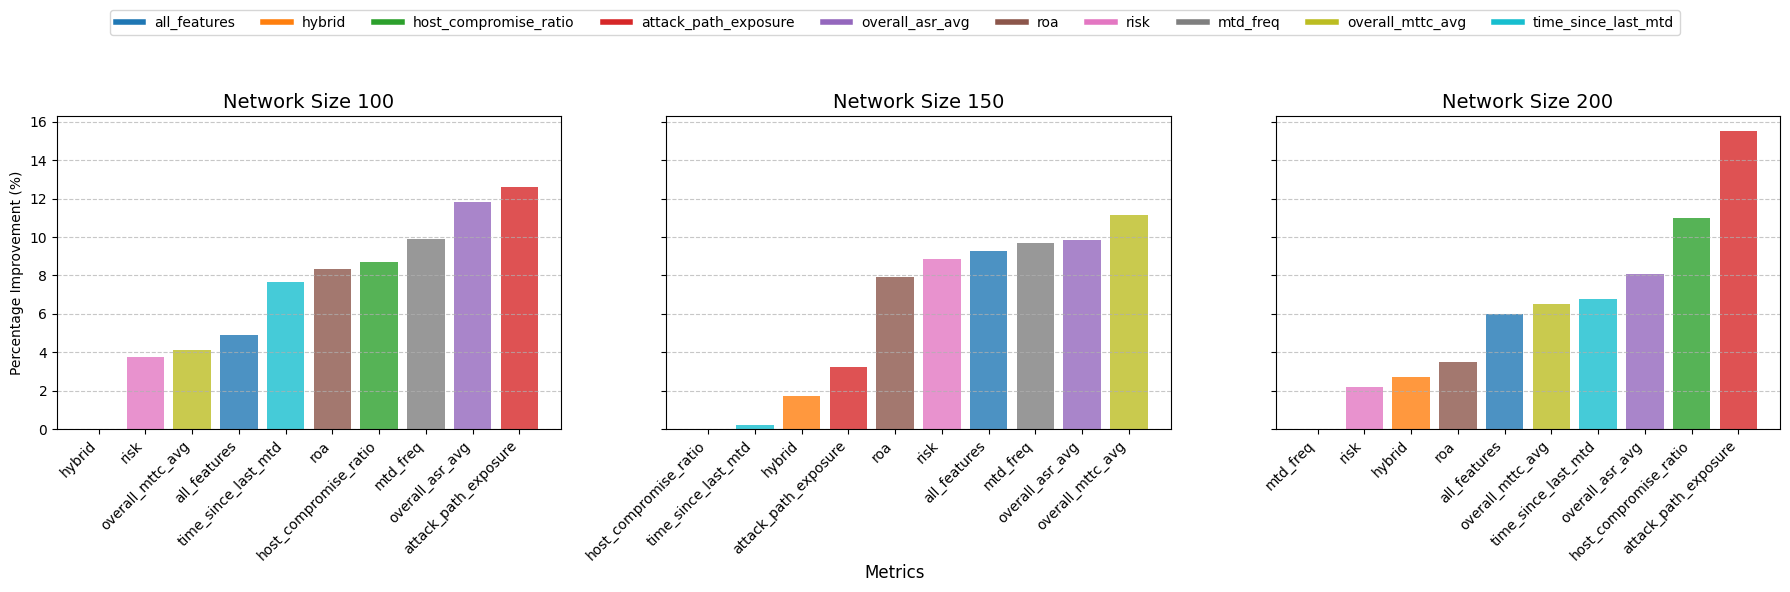

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Use "tab10" colormap for better readability
unique_metrics = results_df.index.unique()
colors = plt.cm.tab10(np.linspace(0, 1, len(unique_metrics)))  # Generate distinct colors
color_map = dict(zip(unique_metrics, colors))  # Map each metric to a unique color

# Create a figure with subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

# List of unique networks
networks = results_df['Network Size'].unique()

# Iterate through each subplot
for i, network_size in enumerate(networks):
    # Filter DataFrame for the current network size
    df_subset = results_df[results_df['Network Size'] == network_size]
    
    # Sort by mean in ascending order
    df_subset = df_subset.sort_values(by='Mean')

    # Normalize the Mean by dividing by the minimum value
    df_subset['Normalized Mean'] = (df_subset['Mean'] - df_subset['Mean'].min()) * 100
    print(df_subset['Normalized Mean'].max())
    # Plot bars with assigned colors
    bars = axs[i].bar(
        df_subset.index, df_subset['Normalized Mean'], 
        color=[color_map[metric] for metric in df_subset.index], alpha=0.8
    )

    # Set titles and labels for each subplot
    axs[i].set_title(f'Network Size {network_size}', fontsize=14)
    axs[i].set_ylabel('Percentage Improvement (%)' if i == 0 else "")  # First subplot has y-axis label
    axs[i].grid(axis='y', linestyle='--', alpha=0.7)  # Add y-axis gridlines

    # Adjust x-tick labels for readability
    axs[i].set_xticks(range(len(df_subset.index)))
    axs[i].set_xticklabels(df_subset.index, rotation=45, ha='right', fontsize=10)

# Create a global legend
handles = [plt.Line2D([0], [0], color=color_map[metric], lw=4, label=metric) 
           for metric in unique_metrics]
fig.legend(handles=handles, loc='upper center', ncol=len(unique_metrics), bbox_to_anchor=(0.5, 1.15))

# Set a global x-label
fig.text(0.5, 0, 'Metrics', ha='center', fontsize=12)

# Adjust layout and spacing
plt.tight_layout()

# Save the figure
plt.savefig("overall_network_size_effect_normalized.png", bbox_inches='tight')

# Show the plot
plt.show()


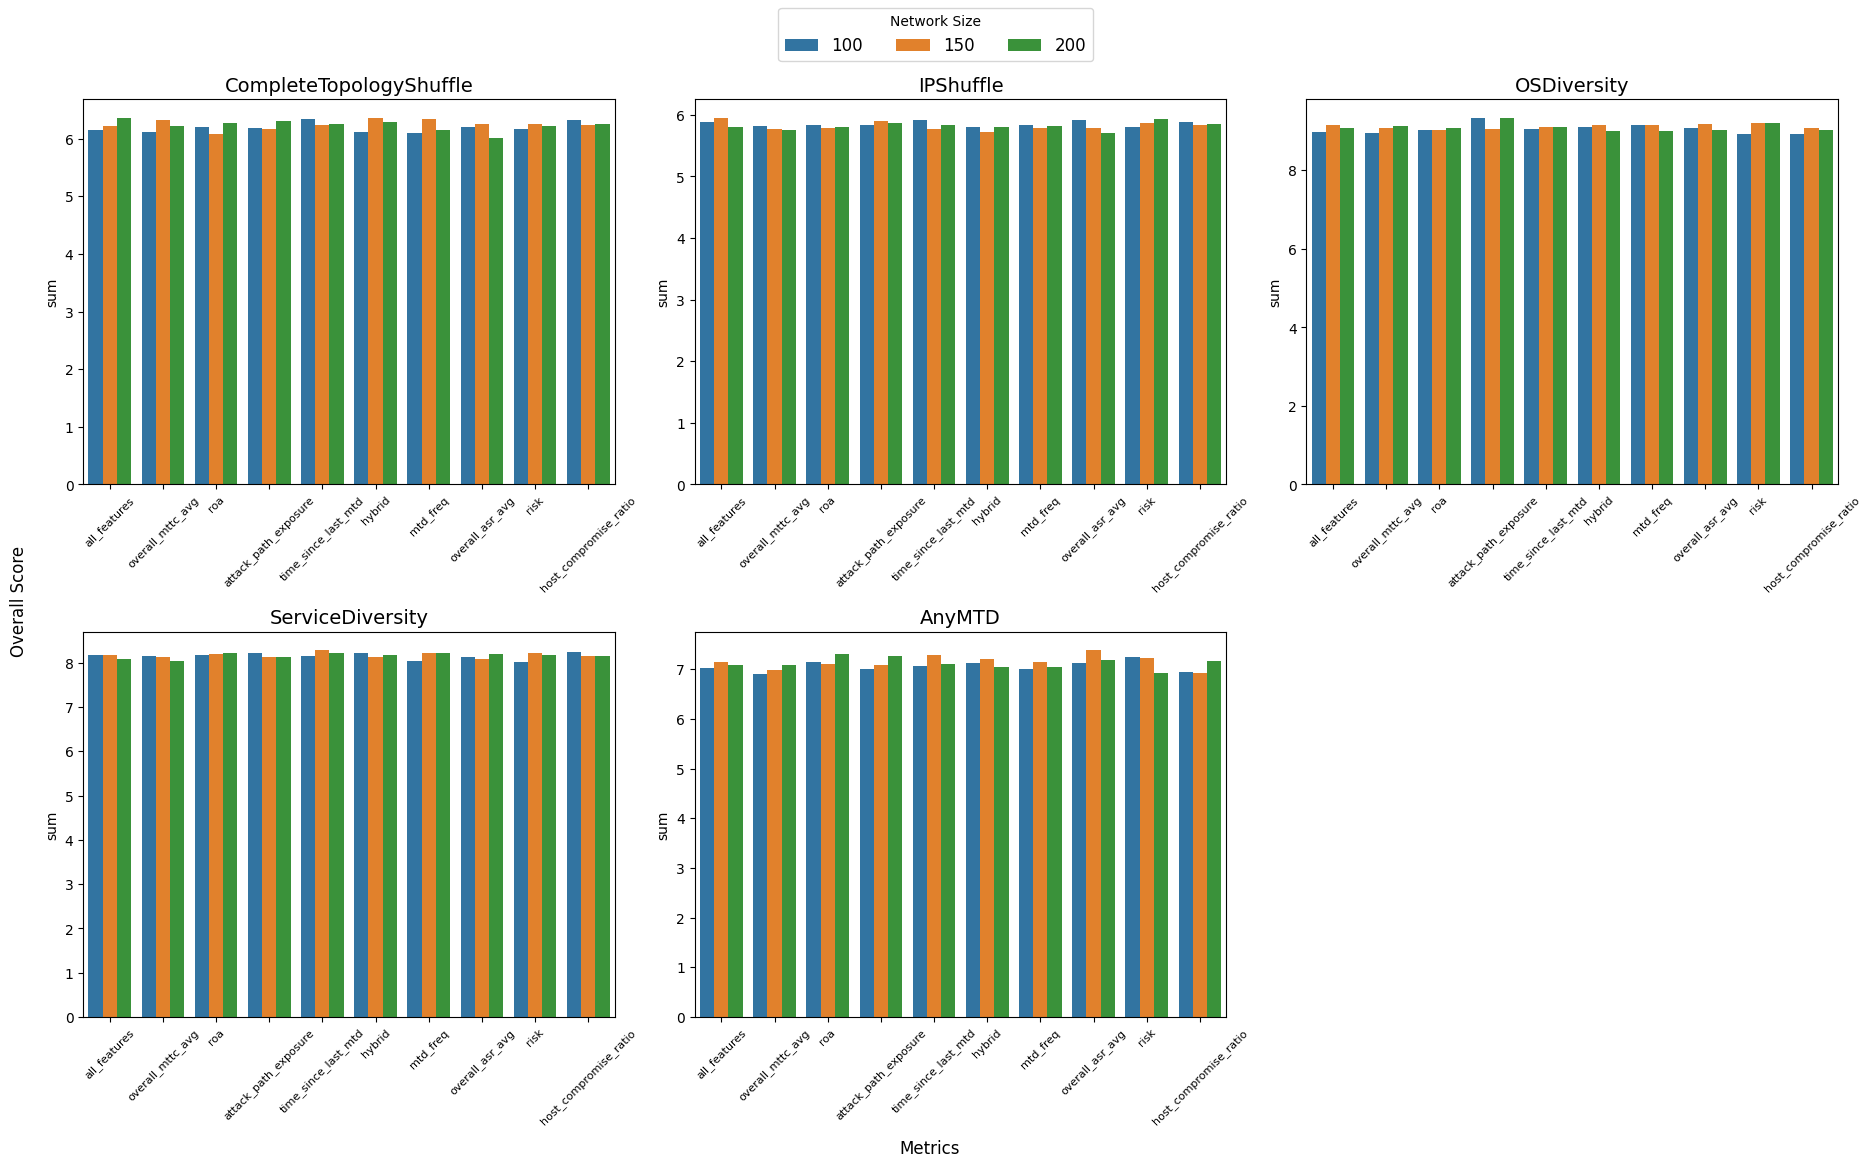

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the plot
num_plots = 5
num_cols = 3  # Number of columns
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate the number of rows needed
fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 12))  # Adjust figsize for better layout
# Flatten the axs array for easy iteration
axs = axs.flatten()

# Loop through the data dictionary to create each plot
for ax, (key, values) in zip(axs, df.items()):
    # Melt the DataFrame to have metrics as one column for Seaborn
    values = values.T
    
    # Extract the part before the last underscore for x-tick labels
    x_labels = values.index.str.rsplit('_', n=1).str[:-1].str.join('_')
    
    # Remove duplicates while preserving order
    x_labels_unique = set(x_labels[x_labels.isin(x_labels.unique())])
    
    # Create a bar plot for the melted DataFrame
    sns.barplot(data=values, x=x_labels, y=values['sum'], hue=values['network_size'], ax=ax)
    
    # Set the title
    ax.set_title(key, fontsize=14)
    
    # Rotate x-tick labels by 45 degrees
    ax.set_xticks(range(len(x_labels_unique)))  # Set ticks to match the number of unique x-ticks
    ax.set_xticklabels(x_labels_unique, rotation=45, fontsize=8)
    ax.legend_.remove()

# Hide the last subplot if needed
if num_plots < len(axs):
    axs[num_plots].axis('off')  # Turn off the last subplot

# Set global labels for the figure
fig.text(0.5, 0.04, 'Metrics', ha='center', fontsize=12)
fig.text(0.04, 0.5, 'Overall Score', va='center', rotation='vertical', fontsize=12)


# Create a global legend
handles, labels = axs[0].get_legend_handles_labels()  # Get handles and labels from the first subplot

# Convert labels to integers (if they are numerical and can be converted)
# This example assumes that labels are strings representing integers.
# Adjust the conversion logic if your labels have a different format.
rounded_labels = [str(int(float(label))) for label in labels]  # Convert labels to integers

# Create the global legend using the rounded labels
fig.legend(handles, rounded_labels, title='Network Size', loc='upper center', ncol=num_cols, fontsize=12)


# Show the plots
plt.tight_layout(rect=[0.05, 0.05, 0.975, 0.95])  # Adjust layout to make room for global labels
plt.savefig("network_size_effect.png")
plt.show()


# Comparison with previous schemes

In [ ]:
radar = RadarPlot("all_features",epsilon, start_time, finish_time, mtd_interval, network_size,total_nodes, new_network,  "other_scheme", trial, result_head_path)
schemes_data = pd.DataFrame(radar.multiple_scaled_pipeline(["random", "alternative", "simultaneous"],run_trial = False)).T.drop(columns=['MEF', 'host_compromise_ratio','network_size', 'exposed_endpoints', "mtd_interval", 'shortest_path_variability'], axis = 1).T.to_dict()

In [ ]:
schemes_data

{'random': {'ASR': 1.478246238530546,
  'time_to_compromise': 1.4025242664786202,
  'attack_path_exposure': 0.9289378430855527,
  'ROA': 0.7439955163227033,
  'risk': 0.9120688329162153},
 'alternative': {'ASR': 1.4724545857803382,
  'time_to_compromise': 1.3825697945619249,
  'attack_path_exposure': 0.9266603149694558,
  'ROA': 0.7344799416295097,
  'risk': 0.9737337639521441},
 'simultaneous': {'ASR': 2.7187473428775877,
  'time_to_compromise': 1.6503449420736318,
  'attack_path_exposure': 0.9285643150295663,
  'ROA': 0.9865608304103636,
  'risk': 1.1342982945786015}}

In [ ]:
other_schemes =pd.DataFrame(schemes_data)

In [ ]:
other_schemes = other_schemes.drop("time_to_compromise", axis=0)

In [ ]:
other_schemes.loc['sum'] = other_schemes.sum(axis=0)

In [ ]:
other_schemes

,random,alternative,simultaneous
ASR,1.478246,1.472455,2.718747
attack_path_exposure,0.928938,0.926660,0.928564
ROA,0.743996,0.734480,0.986561
risk,0.912069,0.973734,1.134298
sum,4.063248,4.107329,5.768171


In [ ]:
data_backup['mtd_interval_200']

{'CompleteTopologyShuffle':                       all_features_CompleteTopologyShuffle  \
 ROA                                               1.145585   
 risk                                              1.102850   
 ASR                                               1.514581   
 attack_path_exposure                              2.253871   
 MEF                                               0.005037   
 mtd_interval                                    200.000000   
 sum                                               6.016888   
 
                       hybrid_CompleteTopologyShuffle  \
 ROA                                         1.243449   
 risk                                        1.190047   
 ASR                                         1.511779   
 attack_path_exposure                        2.246400   
 MEF                                         0.005037   
 mtd_interval                              200.000000   
 sum                                         6.191675   
 
         

In [ ]:
import pandas as pd

# Initialize a list to hold the Series
columns_list = []

# Loop through the items in the specified dictionary
for key, values in data_backup['mtd_interval_200'].items():
    # Access the specific column using the hybrid key and append it to the list
    columns_list.append(values[f'hybrid_{key}'])

# Loop through the items in the specified dictionary
for key, values in data_backup['mtd_interval_200'].items():
    # Access the specific column using the hybrid key and append it to the list
    columns_list.append(values[f'all_features_{key}'])

# Concatenate the list of Series into a DataFrame
result_df = pd.concat(columns_list, axis=1)

# Optionally, you can set the column names if you want to label them
result_df.columns = [f'hybrid_{key}' for key in data_backup['mtd_interval_200'].keys()] + [f'all_features_{key}' for key in data_backup['mtd_interval_200'].keys()]

# Display the resulting DataFrame
print(result_df)


                      hybrid_CompleteTopologyShuffle  hybrid_IPShuffle  \
ROA                                         1.243449          1.025649   
risk                                        1.190047          1.013855   
ASR                                         1.511779          1.678982   
attack_path_exposure                        2.246400          1.675760   
MEF                                         0.005037          0.005033   
mtd_interval                              200.000000        200.000000   
sum                                         6.191675          5.394246   

                      hybrid_OSDiversity  hybrid_ServiceDiversity  \
ROA                             1.334288                 1.211483   
risk                            1.234803                 1.173645   
ASR                             1.565805                 1.537456   
attack_path_exposure            2.733862                 2.613721   
MEF                             0.005067                 0.005

In [ ]:
final_df = pd.concat([result_df, other_schemes], axis=1)

In [ ]:
final_df

,hybrid_CompleteTopologyShuffle,hybrid_IPShuffle,hybrid_OSDiversity,hybrid_ServiceDiversity,hybrid_AnyMTD,all_features_CompleteTopologyShuffle,all_features_IPShuffle,all_features_OSDiversity,all_features_ServiceDiversity,all_features_AnyMTD,random,alternative,simultaneous
ROA,1.243449,1.025649,1.334288,1.211483,1.286312,1.145585,1.091560,1.355360,1.215737,1.235975,0.743996,0.734480,0.986561
risk,1.190047,1.013855,1.234803,1.173645,1.207306,1.102850,1.111268,1.244080,1.091192,1.123562,0.912069,0.973734,1.134298
ASR,1.511779,1.678982,1.565805,1.537456,1.565514,1.514581,1.697130,1.565371,1.536385,1.553198,1.478246,1.472455,2.718747
attack_path_exposure,2.246400,1.675760,2.733862,2.613721,2.420141,2.253871,1.707930,2.689045,2.589975,2.485329,0.928938,0.926660,0.928564
MEF,0.005037,0.005033,0.005067,0.005076,0.005058,0.005037,0.005034,0.005066,0.005076,0.005057,NaN,NaN,NaN
mtd_interval,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,NaN,NaN,NaN
sum,6.191675,5.394246,6.868759,6.536304,6.479272,6.016888,5.607887,6.853856,6.433289,6.398064,4.063248,4.107329,5.768171


In [ ]:
final_df  = final_df.T.drop(columns=['mtd_interval', 'MEF'])

In [ ]:
import matplotlib.ticker as ticker
def plot_n_schemes(title='Comparison of Schemes with Weighted Metrics', font_size=8, name='default', 
                    show_numbers=True, number_font_size=12, legend_font_size=8):
        """
        Plots a stacked bar chart comparing schemes based on weighted metrics.
        
        Parameters:
        - title (str): Title of the plot.
        - show_numbers (bool): Whether to show numerical values on the bars.
        - number_font_size (int): Font size of the numerical values on the bars.
        - legend_font_size (int): Font size of the legend.
        """
        if final_df is None:
            raise ValueError("Weighted data has not been computed. Please run process_weighted_metrics first.")
        
        weighted_df = final_df

        # Calculate standard deviation for each metric and the overall 'sum'
        metric_std_devs = weighted_df.drop(columns=['sum']).std()
        sum_std_dev = weighted_df['sum'].std()

        # Print the standard deviation for each metric and overall 'sum'
        print("Standard deviation for each metric:")
        print(metric_std_devs)
        print(f"\nOverall 'sum' standard deviation: {sum_std_dev:.2f}\n")

        # Sort DataFrame by 'sum'
        weighted_df_sorted = weighted_df.sort_values(by='sum', ascending=True)

        # Set up the figure and axis for the bar chart
        fig, ax = plt.subplots(figsize=(16, 12))

        # Colors for each metric
        colors = plt.cm.tab20.colors

        # Initialize the bottom position for each metric as 0
        bottom = np.zeros(len(weighted_df_sorted))
        metrics = weighted_df.columns  # Include all columns except 'sum', 'zscore', 'minmax'

        # Plot stacked bar chart where schemes are on the x-axis, and metrics are stacked bars
        for i, metric in enumerate(metrics):
            if metric not in ['sum', 'zscore', 'minmax']:  # Exclude the summary metrics
                bars = ax.bar(weighted_df_sorted.index, weighted_df_sorted[metric], 
                            label=metric, color=colors[i % len(colors)], bottom=bottom)
                bottom += weighted_df_sorted[metric].to_numpy()  # Update bottom to stack bars

                # Add numerical values inside each segment of the bars if show_numbers is True
                if show_numbers:
                    for j, bar in enumerate(bars):
                        yval = bar.get_height()
                        # Position the text at the center of the bar segment
                        ax.text(bar.get_x() + bar.get_width() / 2, bottom[j] - yval / 2,  
                                f'{yval:.2f}', ha='center', va='center', 
                                fontsize=number_font_size, color='white')

        # Add the final value on top of the bars
        if show_numbers:
            for idx, total in enumerate(bottom):
                ax.text(idx, total, f'{total:.2f}', ha='center', va='bottom', 
                        fontsize=number_font_size, color='black')

        # Add labels and title
        ax.set_ylabel('Stacked Metric Value')
        ax.set_title(title)
        ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.05), fontsize=legend_font_size)

        # Rotate x-axis labels for better readability
        plt.xticks(rotation=30, ha='right', fontsize=font_size)

        # Set y-axis to have intervals of 0.5
        ax.yaxis.set_major_locator(ticker.MultipleLocator(0.5))
        plt.xlabel("Models")
        # Save the plot as a PNG file
        plt.savefig(f"comparison.png", bbox_inches='tight')

        plt.show()


Standard deviation for each metric:
ROA                     0.202727
risk                    0.100467
ASR                     0.329122
attack_path_exposure    0.701774
dtype: float64

Overall 'sum' standard deviation: 0.92



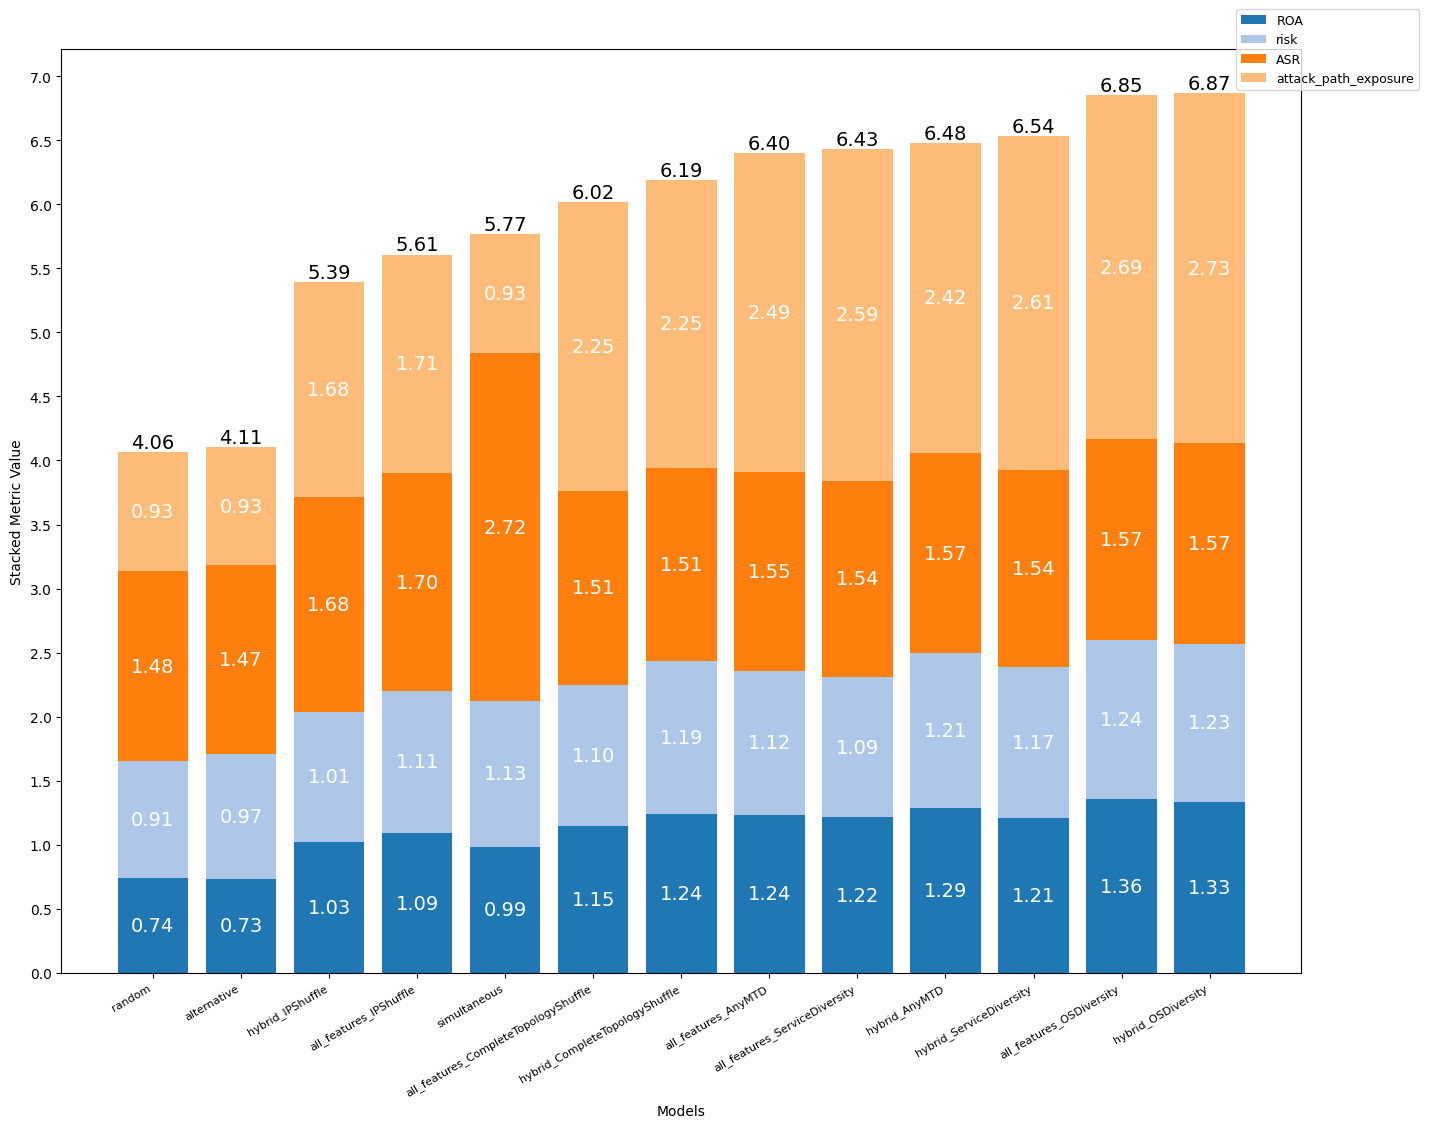

In [ ]:
plot_n_schemes(title=None, font_size=8, name='default', 
                    show_numbers=True, number_font_size=14, legend_font_size=9)